In [ ]:
import requests
import string
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer

import spacy
from spacy import displacy
from spacy.lang.en.stop_words import STOP_WORDS

from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
plt.rcParams["figure.figsize"] = [10,6]
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=13)
plt.rc('ytick', labelsize=13)
plt.rcParams.update({'legend.fontsize': 11})
plt.rcParams.update({'axes.labelsize': 15})
plt.rcParams.update({'font.size': 15})

In [118]:
# Run this to get data from latest list of 250 movies
URLs = ['https://www.imdb.com/search/title/?count=250&groups=top_1000&sort=user_rating',
        'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=250&start=251&ref_=adv_nxt',
       'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=250&start=501&ref_=adv_nxt',
       'https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&count=250&start=751&ref_=adv_nxt']
movie_ids=[]
for url in URLs:
  r = requests.get(url)
  soup = BeautifulSoup(r.content, "lxml")
  entries=soup.findAll('div', class_="ribbonize")
  for a in entries:
    movie_ids.append(a['data-tconst'])

In [119]:
header = 'http://www.omdbapi.com/'
api_key = 'c4a33753'
movie_info=[]
for i in movie_ids:
    url=f"{header}?i={i}&apikey={api_key}"
    r=requests.get(url).json()
    movie=[]
    for a in r.keys():
        movie.append(r[a])
    movie_info.append(movie)
columns=r.keys()
dfff=pd.DataFrame(movie_info, columns=columns)
dfff

Title  Year     Rated  \
0                         The Shawshank Redemption  1994         R   
1                                    The Godfather  1972         R   
2                                  The Dark Knight  2008     PG-13   
3    The Lord of the Rings: The Return of the King  2003     PG-13   
4                                 Schindler's List  1993         R   
..                                             ...   ...       ...   
995                                        Sabrina  1954    Passed   
996                          From Here to Eternity  1953    Passed   
997                Snow White and the Seven Dwarfs  1937  Approved   
998                                   The 39 Steps  1935  Approved   
999                              The Invisible Man  1933  Approved   

        Released  Runtime                         Genre  \
0    14 Oct 1994  142 min                         Drama   
1    24 Mar 1972  175 min                  Crime, Drama   
2    18 Jul 2008  152 min          Action, Crime, Drama   
3    17 Dec 2003  201 min      Action, Adventure, Drama   
4    04 Feb 1994  195 min     Biography, Drama, History   
..           ...      ...                           ...   
995  15 Oct 1954  113 min        Comedy, Drama, Romance   
996  28 Aug 1953  118 min           Drama, Romance, War   
997  04 Feb 1938   83 min  Animation, Adventure, Family   
998  31 Jul 1935   86 min      Crime, Mystery, Thriller   
999  13 Nov 1933   71 min                Horror, Sci-Fi   

                                          Director  \
0                                   Frank Darabont   
1                             Francis Ford Coppola   
2                                Christopher Nolan   
3                                    Peter Jackson   
4                                 Steven Spielberg   
..                                             ...   
995                                   Billy Wilder   
996                                 Fred Zinnemann   
997  William Cottrell, David Hand, Wilfred Jackson   
998                               Alfred Hitchcock   
999                                    James Whale   

                                                Writer  \
0                         Stephen King, Frank Darabont   
1                     Mario Puzo, Francis Ford Coppola   
2    Jonathan Nolan, Christopher Nolan, David S. Goyer   
3          J.R.R. Tolkien, Fran Walsh, Philippa Boyens   
4                     Thomas Keneally, Steven Zaillian   
..                                                 ...   
995      Billy Wilder, Samuel A. Taylor, Ernest Lehman   
996                       Daniel Taradash, James Jones   
997              Jacob Grimm, Wilhelm Grimm, Ted Sears   
998              John Buchan, Charles Bennett, Ian Hay   
999         H.G. Wells, R.C. Sherriff, Preston Sturges   

                                                Actors  \
0              Tim Robbins, Morgan Freeman, Bob Gunton   
1                 Marlon Brando, Al Pacino, James Caan   
2          Christian Bale, Heath Ledger, Aaron Eckhart   
3           Elijah Wood, Viggo Mortensen, Ian McKellen   
4             Liam Neeson, Ralph Fiennes, Ben Kingsley   
..                                                 ...   
995    Humphrey Bogart, Audrey Hepburn, William Holden   
996     Burt Lancaster, Montgomery Clift, Deborah Kerr   
997  Adriana Caselotti, Harry Stockwell, Lucille La...   
998    Robert Donat, Madeleine Carroll, Lucie Mannheim   
999      Claude Rains, Gloria Stuart, William Harrigan   

                                                  Plot  ... Metascore  \
0    Two imprisoned men bond over a number of years...  ...        81   
1    The aging patriarch of an organized crime dyna...  ...       100   
2    When the menace known as the Joker wreaks havo...  ...        84   
3    Gandalf and Aragorn lead the World of Men agai...  ...        94   
4    In German-occupied Poland during World War II,...  ...        94   
..            

In [120]:
dfff.to_csv('Data_Top_1000_Film_IMDB_2022.csv')

In [265]:
imdb = pd.read_csv('Data_Top_1000_Film_IMDB_2022.csv')
imdb.head()

Unnamed: 0                                          Title  Year  Rated  \
0           0                       The Shawshank Redemption  1994      R   
1           1                                  The Godfather  1972      R   
2           2                                The Dark Knight  2008  PG-13   
3           3  The Lord of the Rings: The Return of the King  2003  PG-13   
4           4                               Schindler's List  1993      R   

      Released  Runtime                      Genre              Director  \
0  14 Oct 1994  142 min                      Drama        Frank Darabont   
1  24 Mar 1972  175 min               Crime, Drama  Francis Ford Coppola   
2  18 Jul 2008  152 min       Action, Crime, Drama     Christopher Nolan   
3  17 Dec 2003  201 min   Action, Adventure, Drama         Peter Jackson   
4  04 Feb 1994  195 min  Biography, Drama, History      Steven Spielberg   

                                              Writer  \
0                       Stephen King, Frank Darabont   
1                   Mario Puzo, Francis Ford Coppola   
2  Jonathan Nolan, Christopher Nolan, David S. Goyer   
3        J.R.R. Tolkien, Fran Walsh, Philippa Boyens   
4                   Thomas Keneally, Steven Zaillian   

                                        Actors  ... Metascore imdbRating  \
0      Tim Robbins, Morgan Freeman, Bob Gunton  ...      81.0        9.3   
1         Marlon Brando, Al Pacino, James Caan  ...     100.0        9.2   
2  Christian Bale, Heath Ledger, Aaron Eckhart  ...      84.0        9.0   
3   Elijah Wood, Viggo Mortensen, Ian McKellen  ...      94.0        9.0   
4     Liam Neeson, Ralph Fiennes, Ben Kingsley  ...      94.0        9.0   

   imdbVotes     imdbID   Type          DVD     BoxOffice  Production Website  \
0  2,598,671  tt0111161  movie  21 Dec 1999   $28,767,189         NaN     NaN   
1  1,786,257  tt0068646  movie  11 May 2004  $136,381,073         NaN     NaN   
2  2,562,136  tt0468569  movie  09 Dec 2008  $534,987,076         NaN     NaN   
3  1,780,176  tt0167260  movie  25 May 2004  $378,251,207         NaN     NaN   
4  1,318,385  tt0108052  movie  12 Feb 2008   $96,898,818         NaN     NaN   

  Response  
0     True  
1     True  
2     True  
3     True  
4     True  

[5 rows x 26 columns]

**EDA: Analyzing Columns to Choose for Clustering**

In [270]:
# Empty Dataframe to be used for CLustering
imdb_work = pd.DataFrame()

In [271]:
#Title: Định danh
#Title: Bắt buộc để xác định một thực thể trong tập dữ liệu.
imdb['Title']

0                           The Shawshank Redemption
1                                      The Godfather
2                                    The Dark Knight
3      The Lord of the Rings: The Return of the King
4                                   Schindler's List
                           ...                      
995                                          Sabrina
996                            From Here to Eternity
997                  Snow White and the Seven Dwarfs
998                                     The 39 Steps
999                                The Invisible Man
Name: Title, Length: 1000, dtype: object

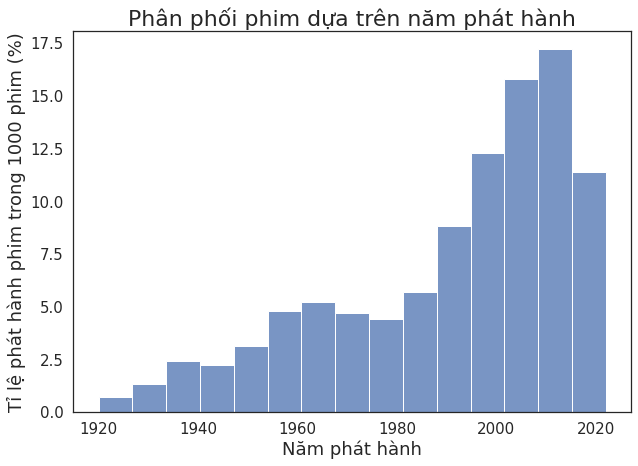

In [272]:
#Year: Năm phát hành phim
plt.figure(figsize=(10,7))
sns.histplot(imdb['Year'],stat='percent')
plt.xlabel('Năm phát hành', fontsize=18)
plt.ylabel('Tỉ lệ phát hành phim trong 1000 phim (%)', fontsize=18)
plt.title('Phân phối phim dựa trên năm phát hành', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

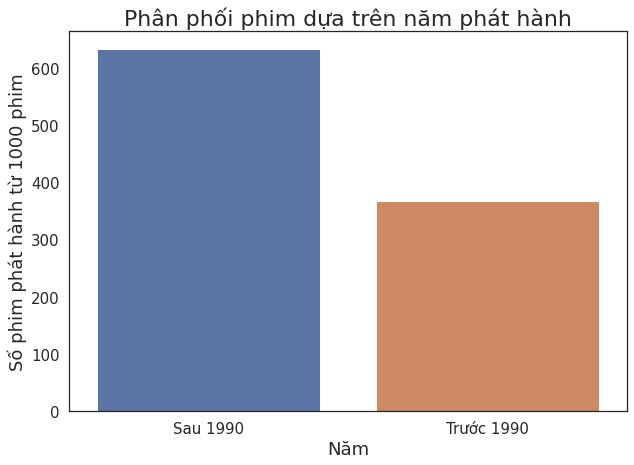

In [273]:
#Vì tỉ lệ phim phát hành sau năm 1990 ~50% nên chuyển đổi năm thành nhị phân
#Với 0 là số phim phát hành trước 1990 và 1 là số phim phát hành sau 1990
imdb['Year_bin'] = imdb['Year'].apply(lambda x:0 if x<1990 else 1)
plt.figure(figsize=(10,7))
sns.countplot(x=imdb['Year_bin'].apply(lambda x:'Trước 1990' if x==0 else 'Sau 1990'))
plt.xlabel('Năm', fontsize=18)
plt.ylabel('Số phim phát hành từ 1000 phim', fontsize=18)
plt.title('Phân phối phim dựa trên năm phát hành', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show() 

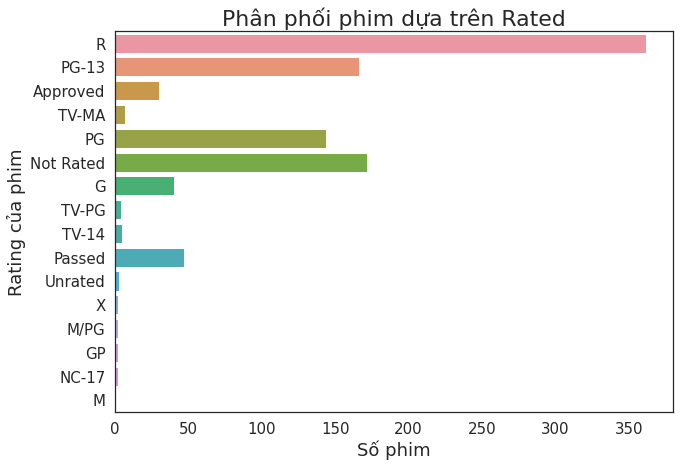

In [274]:
# Xếp hạng phim theo hệ thống đánh giá của kiểm duyệt
# Rated: Xếp hạng của các bộ phim là một dấu hiệu tốt để phân loại chúng.
# Nó rất hữu ích để tạo thành các cụm
plt.figure(figsize=(10,7))
sns.countplot(y=imdb['Rated'])
plt.xlabel('Số phim', fontsize=18)
plt.ylabel('Rating của phim', fontsize=18)
plt.title('Phân phối phim dựa trên Rated', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Approved  G  M  M/PG  NC-17  Not Rated  PG  PG-13  Passed  R  TV-14
0         0  0  0     0      0          0   0      0       0  1      0
1         0  0  0     0      0          0   0      0       0  1      0
2         0  0  0     0      0          0   0      1       0  0      0
3         0  0  0     0      0          0   0      1       0  0      0
4         0  0  0     0      0          0   0      0       0  1      0

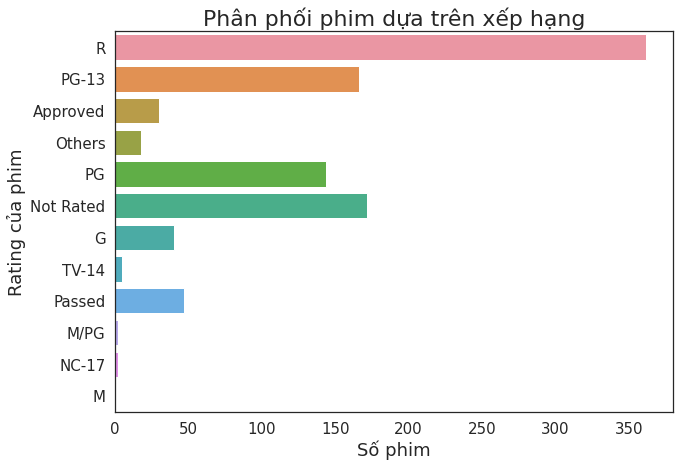

In [275]:
#Hợp nhất các danh mục đã xếp hạng
#Chỉ lấy các xếp hạng quan trọng và kết hợp các xếp hạng khác
imdb['Rated_Cat'] = imdb['Rated'].apply(lambda x: x if x not in ['Unrated', 'TV-PG', 'X', 'GP', 'TV-MA'] else 'Others')
rated_df = pd.get_dummies(imdb['Rated_Cat']).drop('Others',axis=1)
display(rated_df.head())
plt.figure(figsize=(10,7))
sns.countplot(y=imdb['Rated_Cat'])
plt.xlabel('Số phim', fontsize=18)
plt.ylabel('Rating của phim', fontsize=18)
plt.title('Phân phối phim dựa trên xếp hạng', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Runtime: Thời lượng phim tính bằng phút**

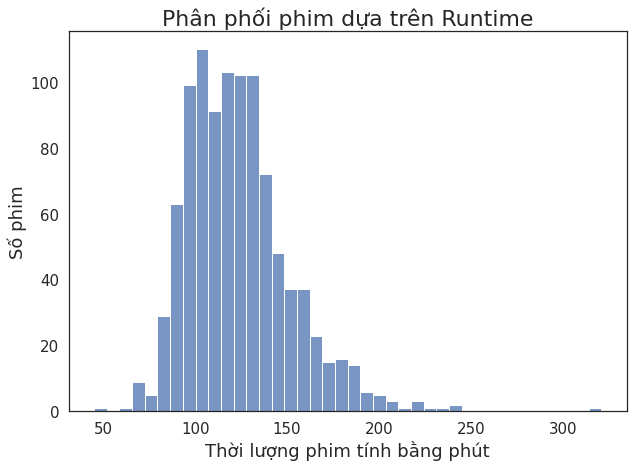

In [276]:
# Runtime: Nó xác định tổng thời lượng của bộ phim.
# Một yếu tố tốt cần xem xét khi thành lập các cụm
plt.figure(figsize=(10,7))
sns.histplot(imdb['Runtime'].apply(lambda x:float(x.split()[0])))
plt.xlabel('Thời lượng phim tính bằng phút', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.title('Phân phối phim dựa trên Runtime', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Chia tỉ lệ thời gian phim: Ngắn, Vừa, Dài**

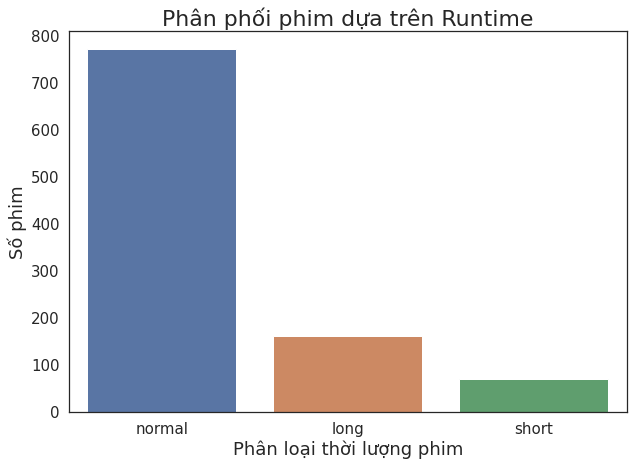

In [279]:

def bin_runtime(Runtime):
  Runtime = float(Runtime.split()[0])
  if Runtime <90:
    return 'short'
  elif Runtime<150:
    return 'normal'
  else:
    return 'long'


imdb['Runtime_bin'] = imdb['Runtime'].apply(bin_runtime)
Runtime_df = pd.get_dummies(imdb['Runtime_bin']).drop('short', axis = 1)
plt.figure(figsize=(10,7))
sns.countplot(x=imdb['Runtime_bin'])
plt.xlabel('Phân loại thời lượng phim', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.title('Phân phối phim dựa trên Runtime', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Directors: Đạo diễn phim**

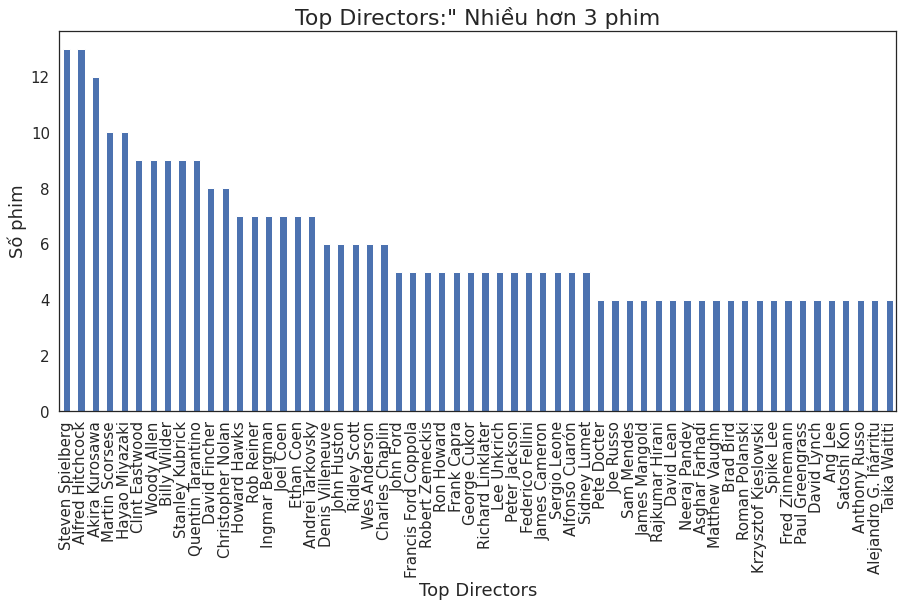

In [280]:
# Đạo diễn: Đạo diễn phim 

plt.figure(figsize = (15,7))
mlb = MultiLabelBinarizer()
one_hot_encoded_director = mlb.fit_transform(imdb['Director'].apply(lambda x:set(x.split(', '))))
dir_df = pd.DataFrame(one_hot_encoded_director, columns=mlb.classes_)
plot_top_dirs = dir_df.sum().sort_values(ascending=False)

# chọn đạo diễn có ít nhất 3 phim
plot_top_dirs[plot_top_dirs>=4].plot.bar()
plt.xlabel('Top Directors', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.title('Top Directors:" Nhiều hơn 3 phim', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
top_dirs_list = list(plot_top_dirs[plot_top_dirs>=4].index)

for col in dir_df.columns: 
  if col not in top_dirs_list:
    dir_df.drop(columns=col, inplace = True)

**Diễn viên: Ngôi sao điện ảnh**

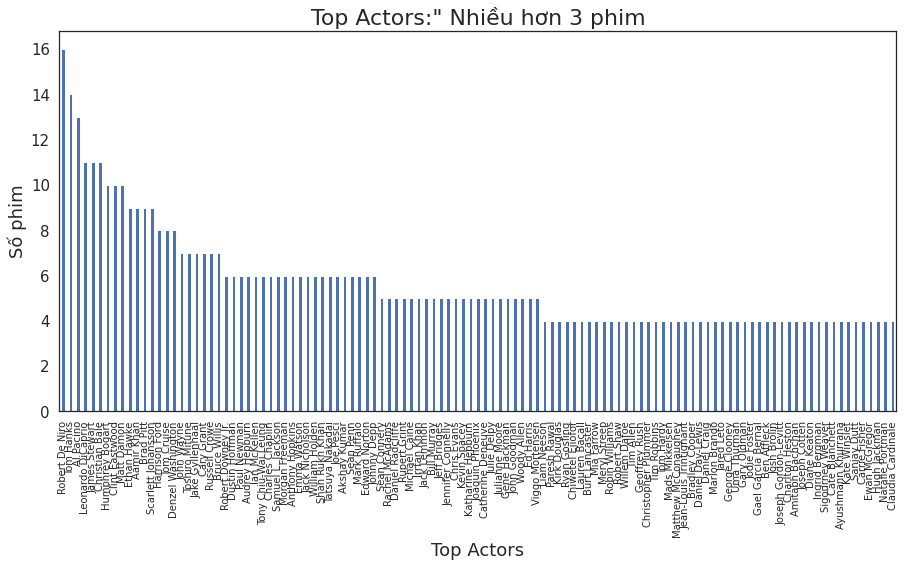

In [281]:
# Diễn viên: Ngôi sao điện ảnh
plt.figure(figsize = (15,7))
mlb = MultiLabelBinarizer()
one_hot_encoded_actor = mlb.fit_transform(imdb['Actors'].apply(lambda x:set(x.split(', '))))
actors_df = pd.DataFrame(one_hot_encoded_actor, columns=mlb.classes_)
plot_top_actor = actors_df.sum().sort_values(ascending=False)

# chọn diễn viên có ít nhất 4 phim
plot_top_actor[plot_top_actor>=4].plot.bar()
plt.xlabel('Top Actors', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.title('Top Actors:" Nhiều hơn 3 phim', fontsize=22)
plt.xticks(fontsize=10)
plt.yticks(fontsize=15)
plt.show()
top_actor_list = list(plot_top_actor[plot_top_actor>=4].index)

for col in actors_df.columns: 
  if col not in top_actor_list:
    actors_df.drop(columns=col, inplace = True)

**Ngôn ngữ: Các ngôn ngữ được phát hành**

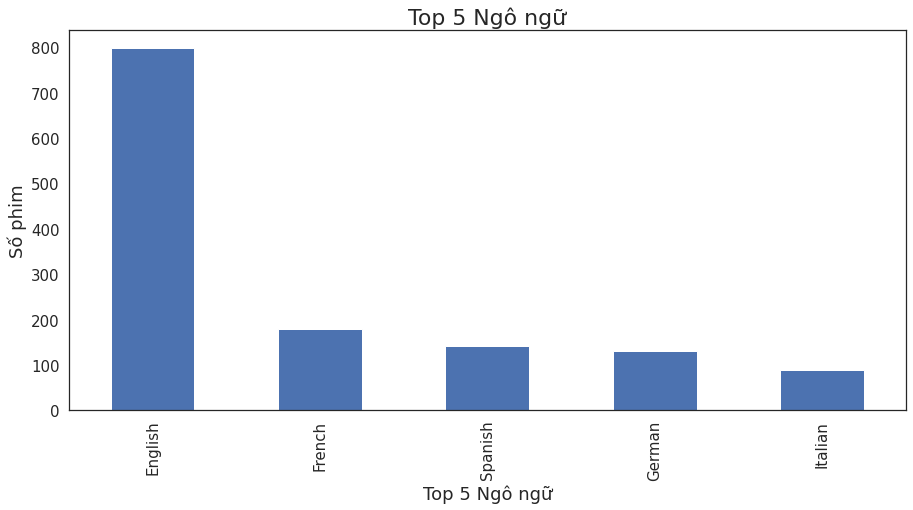

In [282]:
# Ngôn ngữ :  Ngôn ngữ của phim
plt.figure(figsize = (15,7))
mlb = MultiLabelBinarizer()
one_hot_encoded_language = mlb.fit_transform(imdb['Language'].apply(lambda x:set(x.split(', '))))
lang_df = pd.DataFrame(one_hot_encoded_language, columns=mlb.classes_)
plot_top_language = lang_df.sum().sort_values(ascending=False)

#Chọn 5 ngôn ngữ nhiều nhất
plot_top_language[0:5].plot.bar() 
plt.xlabel('Top 5 Ngô ngữ', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.title('Top 5 Ngô ngữ', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
top_language_list = list(plot_top_language[0:5].index)

for col in lang_df.columns: 
  if col not in top_language_list:
    lang_df.drop(columns=col, inplace = True)

**Thể loại: Thể loại phim**

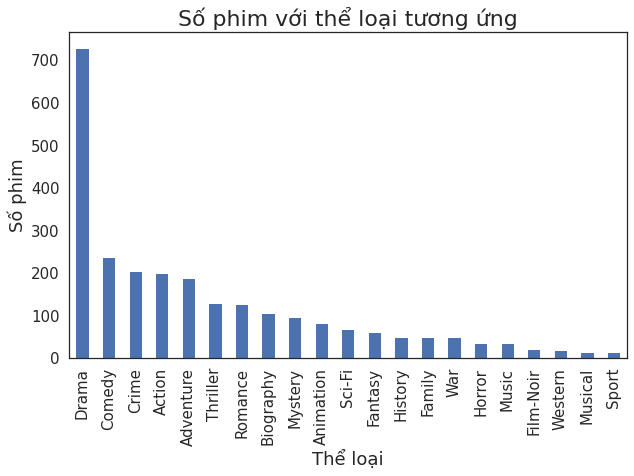

In [283]:
# Thể loại: Đó là một yếu tố quan trọng để phân loại phim
mlb = MultiLabelBinarizer()
one_hot_encoded_genre = mlb.fit_transform(imdb['Genre'].apply(lambda x:set(x.split(', '))))
genre_df = pd.DataFrame(one_hot_encoded_genre, columns=mlb.classes_)
genre_df.sum().sort_values(ascending=False).plot.bar()
plt.xlabel('Thể loại', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.title('Số phim với thể loại tương ứng', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

**Quốc gia: Các quốc gia phát hành Phim**

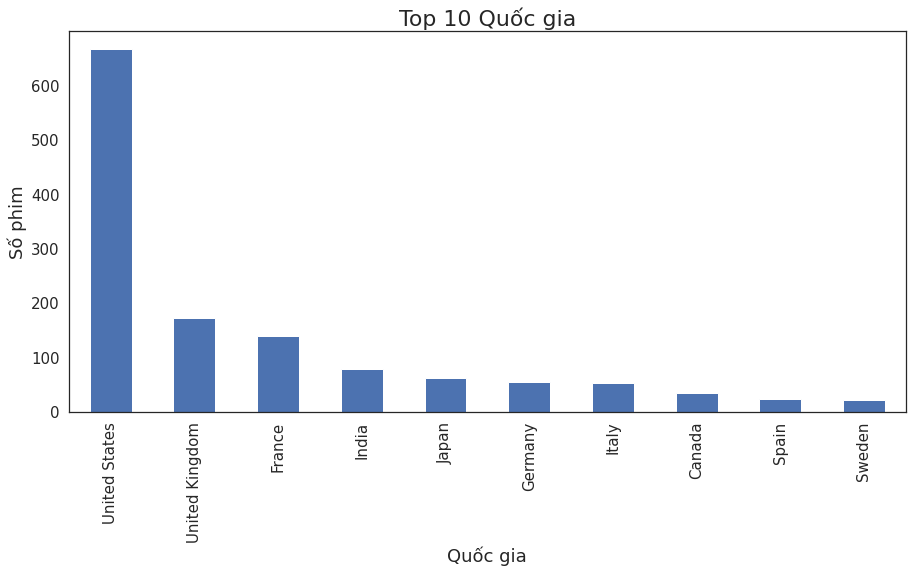

In [284]:
# Quốc gia: Quốc gia sản xuất
plt.figure(figsize = (15,7))
mlb = MultiLabelBinarizer()
one_hot_encoded_country = mlb.fit_transform(imdb['Country'].apply(lambda x:set(x.split(', '))))
country_df = pd.DataFrame(one_hot_encoded_country, columns=mlb.classes_)
plot_top_country = country_df.sum().sort_values(ascending=False)

#Chọn 10 quốc gia
plot_top_country[0:10].plot.bar() 
plt.xlabel('Quốc gia', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.title('Top 10 Quốc gia', fontsize=22)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()
top_country_list = list(plot_top_country[0:10].index)

for col in country_df.columns: 
  if col not in top_country_list:
    country_df.drop(columns=col, inplace = True)

**Cốt truyện: Tóm tắt ngắn gọn về Cốt truyện phim**

In [285]:
# Plot: Plot of Film
nlp = spacy.load('en_core_web_sm')
stopwords = list(STOP_WORDS)


# Chức năng này mã hóa, bôi đen từng từ và sau đó loại bỏ các từ dừng và dấu chấm câu
def preprocess(plot):
    vocab = nlp(plot)
    
    tokens = []
    for token in vocab:
        if token.lemma_ != "-PRON-":
            temp = token.lemma_.lower().strip()
        else:
            temp = token.lower_
        tokens.append(temp)
    
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in string.punctuation:
            cleaned_tokens.append(token)
    return cleaned_tokens
#TFIDF: đánh giá tầm quan trọng của một từ trong một văn bản.
tfidf_vectorizer = TfidfVectorizer(tokenizer=preprocess, ngram_range=(1,3))
tfidf_plot = tfidf_vectorizer.fit_transform(imdb['Plot'])

terms = tfidf_vectorizer.get_feature_names_out()
term_idf_sums = tfidf_plot.sum(axis=0)
term_idf_scores = []
for i in range(len(terms)):
    term_idf_scores.append([terms[i], term_idf_sums[0,i]])
term_idf_scores.sort(key=lambda x: x[1], reverse=True)

# Chọn 50 từ hàng đầu dựa trên điểm TFIDF
print("\nTerms with Highest TF-IDF Scores: Top 50\n")
top_50_words = [word_weight[0] for word_weight in term_idf_scores[:25]]

# Tạo Khung dữ liệu gồm 50 từ hàng đầu với điểm TFIDF tương ứng của chúng
plot_df = pd.DataFrame(tfidf_plot.todense(), columns=terms)[top_50_words]
term_idf_scores[:25]


Terms with Highest TF-IDF Scores: Top 50



[['man', 10.332921142491513],
 ['life', 10.15366998446047],
 ['young', 9.861866132208766],
 ['find', 8.684159141784354],
 ['family', 7.345614270354113],
 ['world', 6.993811907902203],
 ['woman', 6.852524488642146],
 ['year', 6.539874364206221],
 ['war', 6.299138935281446],
 ['new', 5.925859703334379],
 ['story', 5.827512885514985],
 ['love', 5.659578020888844],
 ['old', 5.542776205916475],
 ['friend', 5.530412100442442],
 ['murder', 5.431312696991674],
 ['help', 5.101715248552139],
 ['father', 4.832495850620755],
 ['boy', 4.765808369061006],
 ['girl', 4.4999281561554385],
 ['try', 4.488701479647467],
 ['wife', 4.421646306356053],
 ['force', 4.222466419610161],
 ['lead', 4.199995502292548],
 ['american', 4.072257414790855],
 ['day', 4.010849323531583]]

In [286]:
list(map(lambda x: x[1],term_idf_scores))[:25]

[10.332921142491513,
 10.15366998446047,
 9.861866132208766,
 8.684159141784354,
 7.345614270354113,
 6.993811907902203,
 6.852524488642146,
 6.539874364206221,
 6.299138935281446,
 5.925859703334379,
 5.827512885514985,
 5.659578020888844,
 5.542776205916475,
 5.530412100442442,
 5.431312696991674,
 5.101715248552139,
 4.832495850620755,
 4.765808369061006,
 4.4999281561554385,
 4.488701479647467,
 4.421646306356053,
 4.222466419610161,
 4.199995502292548,
 4.072257414790855,
 4.010849323531583]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



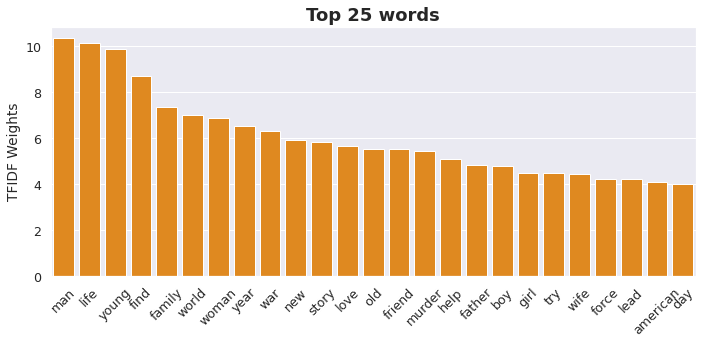

In [287]:
x = list(map(lambda x: x[0],term_idf_scores))[:25]
y = list(map(lambda x: x[1],term_idf_scores))[:25]

plt.figure(figsize=(10,5))
sns.set(font_scale = 1.15)
plt.rc('font', family='calibri light')
sns.barplot(x,y,color='#ff8c00')
plt.title("Top 25 words",fontsize=18, weight='bold')
plt.xticks(rotation=45)
plt.ylabel('TFIDF Weights')
plt.tight_layout()
sns.set_style('white')

# **Tập dữ liệu cuối cùng sau khi tiền xử lý**

In [302]:
# Tạo tập dữ liệu sau tiền xử lý
imdb_work = pd.DataFrame()

# imdb_work['Runtime'] = imdb['Runtime'].apply(lambda x:float(x.split()[0])) # remove 'minutes'
imdb_work['Year'] = imdb['Year_bin']
imdb_work = pd.concat([imdb_work,
                       Runtime_df,
                       country_df,
                       genre_df,
                       actors_df,
                       dir_df,
                       plot_df,
                       rated_df], axis = 1)
imdb_work.set_index(imdb['Title'], inplace = True)

display(imdb_work.info(), imdb_work.head())

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, The Shawshank Redemption to The Invisible Man
Columns: 241 entries, Year to TV-14
dtypes: float64(25), int64(203), uint8(13)
memory usage: 1.8+ MB


None

Year  long  normal  Canada  \
Title                                                                       
The Shawshank Redemption                          1     0       1       0   
The Godfather                                     0     1       0       0   
The Dark Knight                                   1     1       0       0   
The Lord of the Rings: The Return of the King     1     1       0       0   
Schindler's List                                  1     1       0       0   

                                               France  Germany  India  Italy  \
Title                                                                          
The Shawshank Redemption                            0        0      0      0   
The Godfather                                       0        0      0      0   
The Dark Knight                                     0        0      0      0   
The Lord of the Rings: The Return of the King       0        0      0      0   
Schindler's List                                    0        0      0      0   

                                               Japan  Spain  ...  G  M  M/PG  \
Title                                                        ...               
The Shawshank Redemption                           0      0  ...  0  0     0   
The Godfather                                      0      0  ...  0  0     0   
The Dark Knight                                    0      0  ...  0  0     0   
The Lord of the Rings: The Return of the King      0      0  ...  0  0     0   
Schindler's List                                   0      0  ...  0  0     0   

                                               NC-17  Not Rated  PG  PG-13  \
Title                                                                        
The Shawshank Redemption                           0          0   0      0   
The Godfather                                      0          0   0      0   
The Dark Knight                                    0          0   0      1   
The Lord of the Rings: The Return of the King      0          0   0      1   
Schindler's List                                   0          0   0      0   

                                               Passed  R  TV-14  
Title                                                            
The Shawshank Redemption                            0  1      0  
The Godfather                                       0  1      0  
The Dark Knight                                     0  0      0  
The Lord of the Rings: The Return of the King       0  0      0  
Schindler's List                                    0  1      0  

[5 rows x 241 columns]

# **PCA: Giảm chiều dữ liệu**

In [303]:
pca = PCA().fit(imdb_work)

for i in range(10,30):
  #print(i)
  var = round(pca.explained_variance_ratio_[:i].sum(), 2)
  print(i,var)
  if var >= 0.8:
    print("\nSố lượng PCs tối ưu là:",i)
    break

10 0.51
11 0.53
12 0.56
13 0.58
14 0.59
15 0.61
16 0.63
17 0.64
18 0.66
19 0.67
20 0.68
21 0.69
22 0.7
23 0.71
24 0.72
25 0.73
26 0.74
27 0.75
28 0.75
29 0.76


In [298]:
#Xác định Top N thành phần với đủ phương sai
pca = PCA().fit(imdb_work)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]
print('Số lượng các top thành phần chính  : ',len(top_PCA))
print('Phương sai được giải thích bởi Top PC : ', round(pca.explained_variance_ratio_[:21].sum(), 2)*100, '%')

Số lượng các top thành phần chính  :  22
Phương sai được giải thích bởi Top PC :  69.0 %


In [304]:
imdb_work.head()

Year  long  normal  Canada  \
Title                                                                       
The Shawshank Redemption                          1     0       1       0   
The Godfather                                     0     1       0       0   
The Dark Knight                                   1     1       0       0   
The Lord of the Rings: The Return of the King     1     1       0       0   
Schindler's List                                  1     1       0       0   

                                               France  Germany  India  Italy  \
Title                                                                          
The Shawshank Redemption                            0        0      0      0   
The Godfather                                       0        0      0      0   
The Dark Knight                                     0        0      0      0   
The Lord of the Rings: The Return of the King       0        0      0      0   
Schindler's List                                    0        0      0      0   

                                               Japan  Spain  ...  G  M  M/PG  \
Title                                                        ...               
The Shawshank Redemption                           0      0  ...  0  0     0   
The Godfather                                      0      0  ...  0  0     0   
The Dark Knight                                    0      0  ...  0  0     0   
The Lord of the Rings: The Return of the King      0      0  ...  0  0     0   
Schindler's List                                   0      0  ...  0  0     0   

                                               NC-17  Not Rated  PG  PG-13  \
Title                                                                        
The Shawshank Redemption                           0          0   0      0   
The Godfather                                      0          0   0      0   
The Dark Knight                                    0          0   0      1   
The Lord of the Rings: The Return of the King      0          0   0      1   
Schindler's List                                   0          0   0      0   

                                               Passed  R  TV-14  
Title                                                            
The Shawshank Redemption                            0  1      0  
The Godfather                                       0  1      0  
The Dark Knight                                     0  0      0  
The Lord of the Rings: The Return of the King       0  0      0  
Schindler's List                                    0  1      0  

[5 rows x 241 columns]

In [305]:
imdb_work.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, The Shawshank Redemption to The Invisible Man
Columns: 241 entries, Year to TV-14
dtypes: float64(25), int64(203), uint8(13)
memory usage: 1.8+ MB


In [ ]:
import plotly.express as px

imdb_work.iloc[0:,:-1]

pca = PCA(n_components=2)
components = pca.fit_transform(imdb_work.iloc[0:,:-1])
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter(
    components, x=0, y=1, color=imdb['Runtime_bin'],
    title=f'Tổng phương sai được giải thích: {total_var:.2f}%'+'\n\n\n\n'+'Phân loại thời gian',
    labels={'0': 'PC 1 (11%)', '1': 'PC 2 (9%)', '2': 'PC 3 (8.5%)'})

fig.show()

In [ ]:
pca = PCA(n_components=3)

imdb_work.iloc[0:,:-1]

components = pca.fit_transform(imdb_work.iloc[0:,:-1])
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=imdb['Runtime_bin'],
    title=f'Total Explained Variance: {total_var:.2f}%'+'\n\n\n\n'+'Runtime_bin',
    labels={'0': 'PC 1 (11%)', '1': 'PC 2 (9%)', '2': 'PC 3 (8.5%)'}
)
fig.show()

In [ ]:
pca = PCA(n_components=4)
components = pca.fit_transform(imdb_work.iloc[0:,:-1])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=imdb['Runtime_bin'],
    title="Movie Length Devision by Principal Componensts"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [ ]:
import plotly.express as px

imdb_work.iloc[0:,:-1]

pca = PCA(n_components=2)
components = pca.fit_transform(imdb_work.iloc[0:,:-4])

fig = px.scatter(components, x=0, y=1, color=imdb['Year_bin'],
    title= f'Total Explained Variance: {total_var:.2f}% '+' \n\n\n\n'+'Year_bin',
    labels={'0': 'PC 1 (11%)', '1': 'PC 2 (9%)', '2': 'PC 3 (8.5%)'})

fig.show()

In [ ]:
pca = PCA(n_components=3)

imdb_work.iloc[0:,:-1]

components = pca.fit_transform(imdb_work.iloc[0:,:-2])
total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=imdb['Year_bin'],
    title=f'Total Explained Variance: {total_var:.2f}%'+' \n\n\n\n'+'Year_bin',
    labels={'0': 'PC 1 (11%)', '1': 'PC 2 (9%)', '2': 'PC 3 (8.5%)'}
)
fig.show()

In [ ]:
pca = PCA(n_components=4)
components = pca.fit_transform(imdb_work.iloc[0:,:-2])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=imdb['Year_bin'],
    title="Movie Casted Year Devision by Principal Componensts"
)
fig.update_traces(diagonal_visible=False)
fig.show()

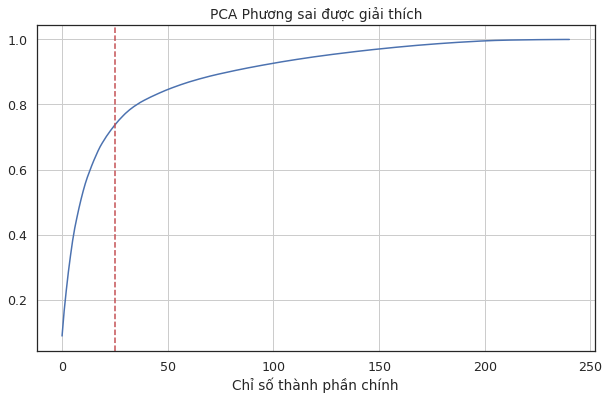

In [306]:
pca = PCA().fit(imdb_work)
top_PCA=["%.2f" % a for a in pca.explained_variance_ratio_ if a >=0.01]

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid()
plt.axvline(x=25, color = 'r', linestyle = '--', )
plt.xlabel("Chỉ số thành phần chính")
#plt.ylabel("Explained Variance Ratio")
plt.title("PCA Phương sai được giải thích")
sns.set_style('white')

In [307]:
pca_1 = pca.components_[0]
pca_1_df = pd.DataFrame(zip(pca_1,imdb_work.columns), columns = ['Weights','Features'])
pca_1_df['Weights'] = abs(pca_1_df['Weights'])
pca_1_df.sort_values('Weights', ascending = False)[:10]

Weights       Features
19   0.495953          Drama
14   0.417647      Adventure
12   0.367033  United States
239  0.244084              R
235  0.221440      Not Rated
236  0.219070             PG
18   0.182960          Crime
17   0.181552         Comedy
13   0.175948         Action
15   0.171073      Animation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



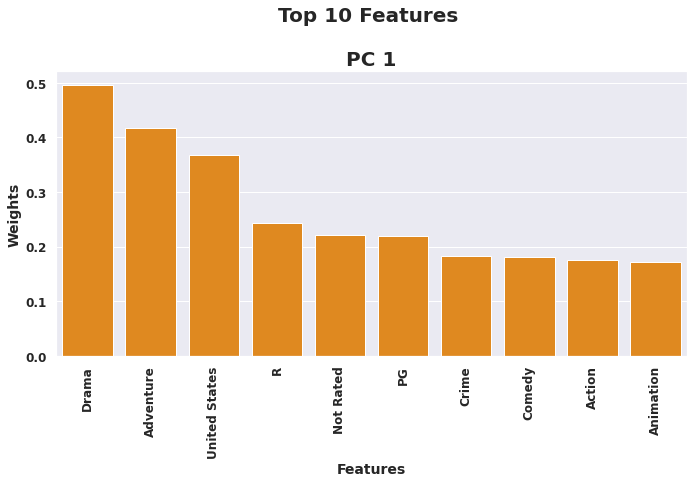

In [308]:
# PC1 feature importance
top_features = pca_1_df.sort_values('Weights', ascending = False)[:10]

plt.figure(figsize=(10,6))
sns.set(font_scale = 1.3)
plt.rc('font', family='calibri light')
plt.title("Top 10 Features \n\n PC 1 ",fontsize=20, weight='bold')
plt.xticks(rotation=90, weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.xlabel("Features",weight='bold',fontsize=14)
plt.ylabel("Weights",weight='bold',fontsize=14)
#plt.barh(x,y)
plt.tight_layout()
sns.barplot(top_features["Features"],top_features["Weights"],color='#ff8c00')
sns.set_style('white')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



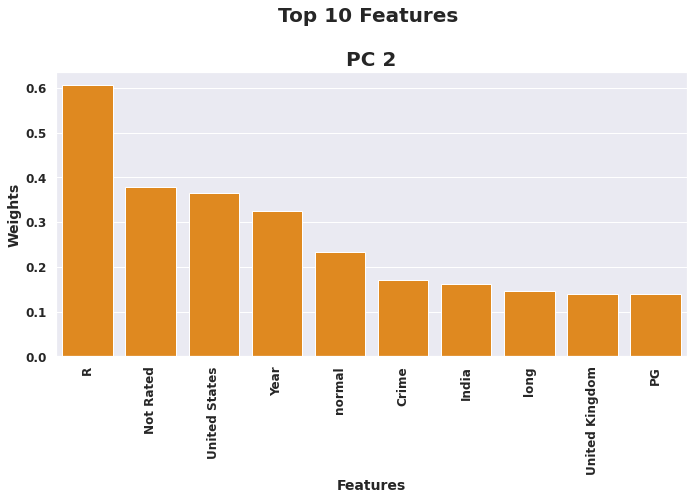

In [309]:
# PC2 feature importance
pca_2 = pca.components_[1]
pca_2_df = pd.DataFrame(zip(pca_2,imdb_work.columns), columns = ['Weights','Features'])
pca_2_df['Weights'] = abs(pca_2_df['Weights'])
pca_2_df.sort_values('Weights', ascending = False)[:10]

top_features = pca_2_df.sort_values('Weights', ascending = False)[:10]

plt.figure(figsize=(10,6))
sns.set(font_scale = 1.3)
plt.rc('font', family='calibri light')
plt.title("Top 10 Features \n\n PC 2 ",fontsize=20, weight='bold')
plt.xticks(rotation=90, weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.xlabel("Features",weight='bold',fontsize=14)
plt.ylabel("Weights",weight='bold',fontsize=14)
plt.tight_layout()
sns.barplot(top_features["Features"],top_features["Weights"],color='#ff8c00')
sns.set_style('white')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



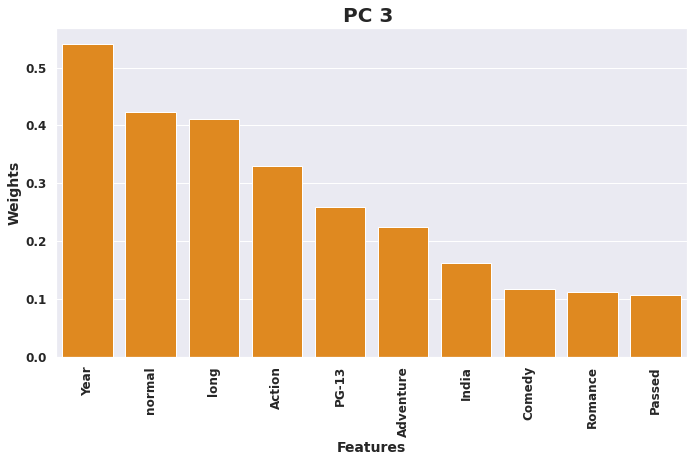

In [310]:
# PC3 feature importance
pca_3 = pca.components_[2]
pca_3_df = pd.DataFrame(zip(pca_3,imdb_work.columns), columns = ['Weights','Features'])
pca_3_df['Weights'] = abs(pca_3_df['Weights'])
pca_3_df.sort_values('Weights', ascending = False)[:10]

top_features = pca_3_df.sort_values('Weights', ascending = False)[:10]

plt.figure(figsize=(10,6))
sns.set(font_scale = 1.3)
plt.rc('font', family='calibri light')
plt.title("PC 3 ",fontsize=20, weight='bold')
plt.xticks(rotation=90, weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.xlabel("Features",weight='bold',fontsize=14)
plt.ylabel("Weights",weight='bold',fontsize=14)
plt.tight_layout()
sns.barplot(top_features["Features"],top_features["Weights"],color='#ff8c00')
sns.set_style('white')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



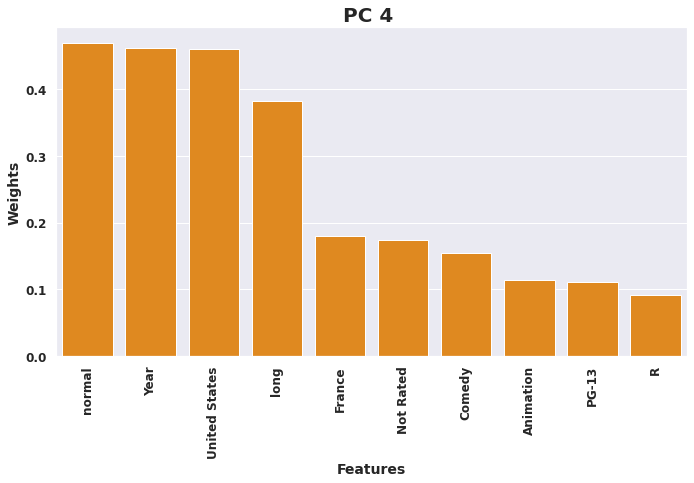

In [311]:
# PC4 feature importance
pca_4 = pca.components_[3]
pca_4_df = pd.DataFrame(zip(pca_4,imdb_work.columns), columns = ['Weights','Features'])
pca_4_df['Weights'] = abs(pca_4_df['Weights'])
pca_4_df.sort_values('Weights', ascending = False)[:10]

top_features = pca_4_df.sort_values('Weights', ascending = False)[:10]

plt.figure(figsize=(10,6))
sns.set(font_scale = 1.3)
plt.rc('font', family='calibri light')
plt.title("PC 4 ",fontsize=20, weight='bold')
plt.xticks(rotation=90, weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.xlabel("Features",weight='bold',fontsize=14)
plt.ylabel("Weights",weight='bold',fontsize=14)
plt.tight_layout()
sns.barplot(top_features["Features"],top_features["Weights"],color='#ff8c00')
sns.set_style('white')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



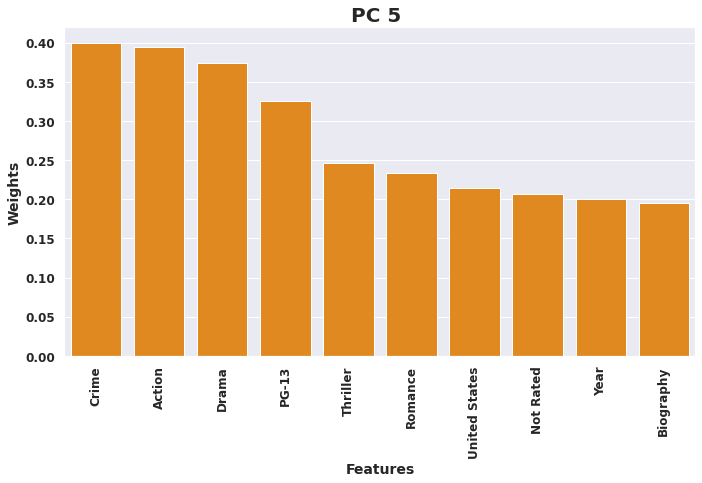

In [312]:
# PC5 feature importance
pca_5 = pca.components_[4]
pca_5_df = pd.DataFrame(zip(pca_5,imdb_work.columns), columns = ['Weights','Features'])
pca_5_df['Weights'] = abs(pca_5_df['Weights'])
pca_5_df.sort_values('Weights', ascending = False)[:10]

top_features = pca_5_df.sort_values('Weights', ascending = False)[:10]

plt.figure(figsize=(10,6))
sns.set(font_scale = 1.3)
plt.rc('font', family='calibri light')
plt.title("PC 5 ",fontsize=20, weight='bold')
plt.xticks(rotation=90, weight='bold',fontsize=12)
plt.yticks(weight='bold',fontsize=12)
plt.xlabel("Features",weight='bold',fontsize=14)
plt.ylabel("Weights",weight='bold',fontsize=14)
plt.tight_layout()
sns.barplot(top_features["Features"],top_features["Weights"],color='#ff8c00')
sns.set_style('white')

In [313]:
#Chuyển đổi dữ liệu gốc bằng PCA với 25 thành phần
pca_25 = PCA(n_components=25).fit(imdb_work)
imdb_work_pca = pca_25.transform(imdb_work)
pca_df = pd.DataFrame(imdb_work_pca, columns = [f'PC{i}' for i in range(1,26)], index = imdb['Title'])
pca_df.head()

PC1       PC2       PC3  \
Title                                                                         
The Shawshank Redemption                      -0.262503 -0.776427 -0.151292   
The Godfather                                 -0.685128 -0.249197  0.160986   
The Dark Knight                               -0.162108 -0.233368  1.446987   
The Lord of the Rings: The Return of the King  0.433369  0.148335  1.616278   
Schindler's List                              -0.650689 -0.435772  0.770464   

                                                    PC4       PC5       PC6  \
Title                                                                         
The Shawshank Redemption                       0.022940 -0.190403  0.099016   
The Godfather                                  1.477795  0.389121  0.318577   
The Dark Knight                                0.644150 -0.098121 -0.593929   
The Lord of the Rings: The Return of the King  0.579820 -0.275079 -0.443844   
Schindler's List                               0.997791 -0.500606  0.264252   

                                                    PC7       PC8       PC9  \
Title                                                                         
The Shawshank Redemption                      -0.067357  0.336083 -0.425354   
The Godfather                                 -0.089181  0.113395  0.198636   
The Dark Knight                               -0.320100 -0.498587  0.743668   
The Lord of the Rings: The Return of the King -0.208984 -0.162395 -0.390839   
Schindler's List                               0.306289  0.293003 -0.196940   

                                                   PC10  ...      PC16  \
Title                                                    ...             
The Shawshank Redemption                       0.039320  ... -0.003298   
The Godfather                                 -0.110242  ... -0.126912   
The Dark Knight                               -0.496551  ...  0.352221   
The Lord of the Rings: The Return of the King  0.073636  ...  0.044058   
Schindler's List                              -0.084967  ... -0.123940   

                                                   PC17      PC18      PC19  \
Title                                                                         
The Shawshank Redemption                       0.104022  0.080239  0.020689   
The Godfather                                 -0.095740  0.180233  0.095960   
The Dark Knight                                0.236977 -0.011038 -0.045275   
The Lord of the Rings: The Return of the King -0.222946 -0.088617 -0.295549   
Schindler's List                              -0.073494 -0.187739 -0.001821   

                                                   PC20      PC21      PC22  \
Title                                                                         
The Shawshank Redemption                       0.011442  0.088053  0.139262   
The Godfather                                 -0.226522 -0.123680 -0.016604   
The Dark Knight                                0.019240 -0.072103  0.095205   
The Lord of the Rings: The Return of the King -0.090670 -0.197872 -0.098241   
Schindler's List                              -0.116507  0.206837 -0.130376   

                                                   PC23      PC24      PC25  
Title                                                                        
The Shawshank Redemption                      -0.092299 -0.046494 -0.017622  
The Godfather                                  0.009938  0.060660 -0.066951  
The Dark Knight                                0.052710 -0.214834 -0.041289  
The Lord of the Rings: The Return of the King -0.013099 -0.158200  0.032165  
Schindler's List                               0.045959  0.295871  0.053989  

[5 rows x 25 columns]

In [314]:
pca_1 = pca_25.components_.sum(axis=1)
pca_1_df = pd.DataFrame(zip(pca_1,imdb_work.columns), columns = ['Weights','Features'])
pca_1_df['Weights'] = abs(pca_1_df['Weights'])
pca_1_df.sort_values('Weights', ascending = False)[:20]

Weights        Features
24  2.221039          Horror
23  1.242802         History
17  1.171006          Comedy
1   1.142571            long
2   1.029085          normal
11  0.955874  United Kingdom
8   0.913608           Japan
21  0.868308         Fantasy
18  0.648598           Crime
4   0.625295          France
19  0.624699           Drama
15  0.457935       Animation
22  0.418517       Film-Noir
13  0.367642          Action
20  0.330044          Family
0   0.306704            Year
7   0.276386           Italy
14  0.220267       Adventure
16  0.181690       Biography
5   0.181203         Germany

Text(0, 0.5, 'Weights')

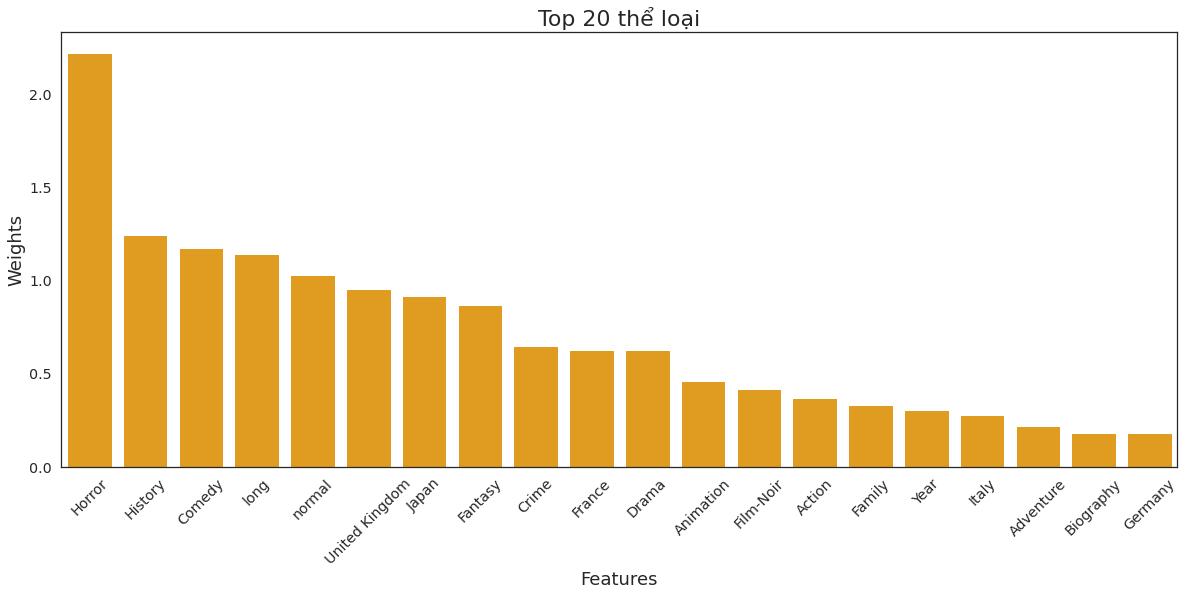

In [315]:
plt.figure(figsize = (20,8))
sns.barplot(x='Features', y='Weights', data=pca_1_df.sort_values('Weights',ascending=False).iloc[:20,:], color='orange')
plt.xticks(rotation=45)
plt.title('Top 20 thể loại', fontsize=22)
plt.xlabel('Features', fontsize=18)
plt.ylabel('Weights', fontsize=18)

### **PHÂN CỤM**

# **Kmeans**

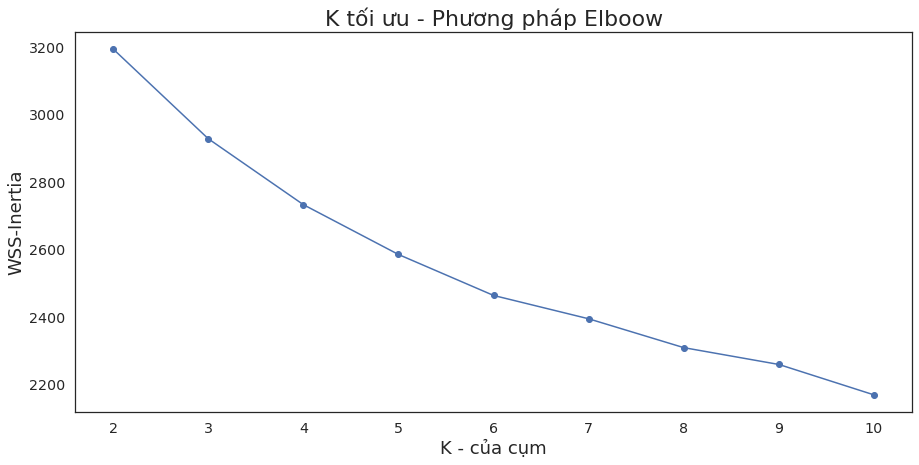

In [316]:
#Tìm K Tối ưu
# Phương pháp Inertia and Elbow 
inertia = []
K = range(2,11)
for k in K:
    km = KMeans(n_clusters=k, random_state = 100)
    km = km.fit(imdb_work_pca )
    inertia.append(km.inertia_)
plt.figure(figsize=(15,7))
plt.plot(K,inertia, 'o-') # k = 4 or 5
plt.xlabel("K - của cụm",fontsize=18)
plt.ylabel("WSS-Inertia", fontsize=18)
plt.title("K tối ưu - Phương pháp Elboow", fontsize=22)
plt.savefig('K-Elbow.png')
plt.show()

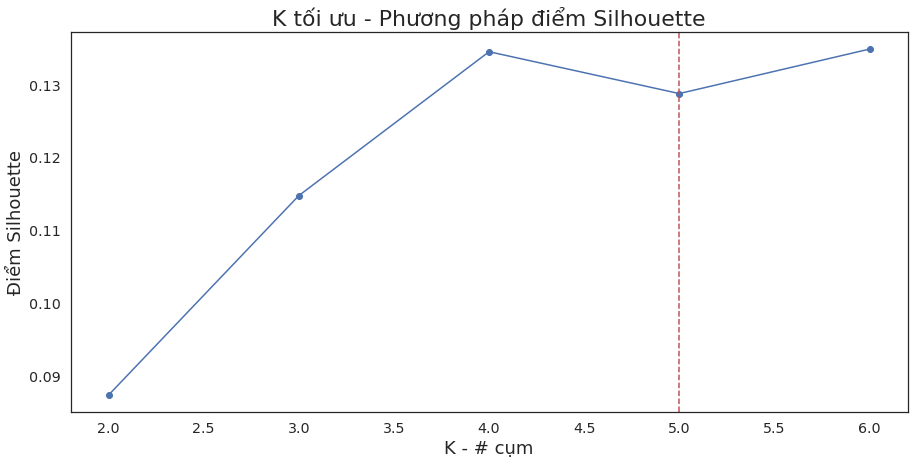

In [317]:
SW = []
K = range(2,7)
for k in K:
    KM=KMeans(n_clusters=k, random_state = 100)
    KM.fit(imdb_work_pca)
    SW.append(silhouette_score(imdb_work_pca, KM.labels_, metric='euclidean'))

plt.figure(figsize=(15,7))
plt.plot(K,SW, 'o-') # k = 4 or 5
plt.xlabel("K - # cụm",fontsize=18)
plt.ylabel("Điểm Silhouette", fontsize=18)
plt.title("K tối ưu - Phương pháp điểm Silhouette", fontsize=22)
plt.axvline(x=5, color = 'r', linestyle = '--', )
plt.savefig('K-SW.png')
plt.show()
#kết quả: K = 5

In [318]:
#Tiến hành phân cụm với K = 5
from sklearn.cluster import MiniBatchKMeans
km=MiniBatchKMeans(n_clusters=5,init='k-means++',max_iter=500,n_init=1000,init_size=1000,batch_size=1000,
                  verbose=False, random_state=5621)
km_model=km.fit(imdb_work_pca)
kmeanlabels=km.labels_
kmeanclusters = km.predict(imdb_work_pca)
kmeandistances = km.transform(imdb_work_pca)

In [319]:
imdb_work['Cluster_Labels'] = kmeanlabels
imdb['Cluster_Labels'] = kmeanlabels
imdb_work['Cluster_Labels'].value_counts() #số lượng phim trên mỗi cụm (cụm từ 0 đến 4)

1    399
4    207
3    163
0    161
2     70
Name: Cluster_Labels, dtype: int64

**Đặc điểm phân cụm K-means**

In [320]:
imdb_work[imdb_work['Cluster_Labels'] == 0].index

Index(['Hara-Kiri', 'Asuran', 'Grave of the Fireflies', 'Your Name.',
       'Shershaah', 'Come and See', 'High and Low',
       'Ayla: The Daughter of War', 'Pather Panchali', 'Ikiru',
       ...
       'Zulu', 'Jules and Jim', 'Breathless', 'The Caine Mutiny', 'Key Largo',
       'Celda 211', 'Repulsion', 'Peeping Tom', 'Les yeux sans visage',
       'The 39 Steps'],
      dtype='object', name='Title', length=161)

In [321]:
imdb_work[imdb_work['Cluster_Labels'] == 1].index

Index(['The Shawshank Redemption', 'The Godfather', 'Schindler's List',
       'The Godfather: Part II', '12 Angry Men', 'Pulp Fiction', 'Fight Club',
       'The Good, the Bad and the Ugly', 'The Matrix', 'Goodfellas',
       ...
       'My Cousin Vinny', 'Barton Fink', 'The Godfather: Part III', 'RoboCop',
       'Lethal Weapon', 'The Fly', 'After Hours',
       'The Taking of Pelham One Two Three', 'Enter the Dragon',
       'From Here to Eternity'],
      dtype='object', name='Title', length=399)

In [322]:
imdb_work[imdb_work['Cluster_Labels'] == 2].index

Index(['Jai Bhim', 'Soorarai Pottru', 'Seven Samurai', 'K.G.F: Chapter 2',
       'Sardar Udham', 'Cinema Paradiso', '96', 'Drishyam 2', '3 Idiots',
       'Amadeus', 'Raatchasan', 'Dangal', 'Drishyam', 'Like Stars on Earth',
       'Lawrence of Arabia', 'Metropolis', 'K.G.F: Chapter 1',
       'Baahubali 2: The Conclusion', 'Drishyam', 'Bhaag Milkha Bhaag',
       'Gangs of Wasseypur', 'Downfall', 'Children of Heaven',
       'Gone with the Wind', 'RRR', 'Bajrangi Bhaijaan', 'Haider', 'PK',
       'Barfi!', 'Zindagi Na Milegi Dobara', 'Let's Go! India',
       'Color It Yellow', 'Munna Bhai M.B.B.S.', 'Swades', 'Dil Chahta Hai',
       'Hera Pheri', 'Sarfarosh', 'Lagaan: Once Upon a Time in India',
       'Underground', 'Farewell My Concubine', 'Gandhi', 'Stalker',
       'The Message', 'Sholay', 'The Sound of Music',
       'The Best Years of Our Lives', 'Winter Sleep',
       'Baahubali: The Beginning', 'The Legend of 1900',
       'Dilwale Dulhania Le Jayenge', 'Andaz Apna Apna', '

In [323]:
imdb_work[imdb_work['Cluster_Labels'] == 3].index

Index(['The Dark Knight', 'The Lord of the Rings: The Return of the King',
       'Inception', 'The Lord of the Rings: The Two Towers',
       'The Lord of the Rings: The Fellowship of the Ring', 'Forrest Gump',
       'Top Gun: Maverick', 'Interstellar', 'Life Is Beautiful',
       'The Prestige',
       ...
       'Stardust', 'I Am Sam', 'The Others',
       'Star Wars: Episode III - Revenge of the Sith', 'The Fifth Element',
       'Le Dîner de Cons', 'The Bridges of Madison County',
       'The Naked Gun: From the Files of Police Squad!', 'The Birds',
       'Rebel Without a Cause'],
      dtype='object', name='Title', length=163)

In [326]:
imdb_work[imdb_work['Cluster_Labels'] == 4].index

Index(['Star Wars: Episode V - The Empire Strikes Back', 'Spirited Away',
       'Star Wars', 'It's a Wonderful Life', 'The Lion King',
       'Back to the Future', 'Rear Window', 'Casablanca', 'Modern Times',
       'City Lights',
       ...
       'The Little Mermaid', 'The Road Warrior',
       'Close Encounters of the Third Kind', 'Where Eagles Dare',
       'The Odd Couple', 'The Jungle Book', 'Breakfast at Tiffany's',
       'Sabrina', 'Snow White and the Seven Dwarfs', 'The Invisible Man'],
      dtype='object', name='Title', length=207)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



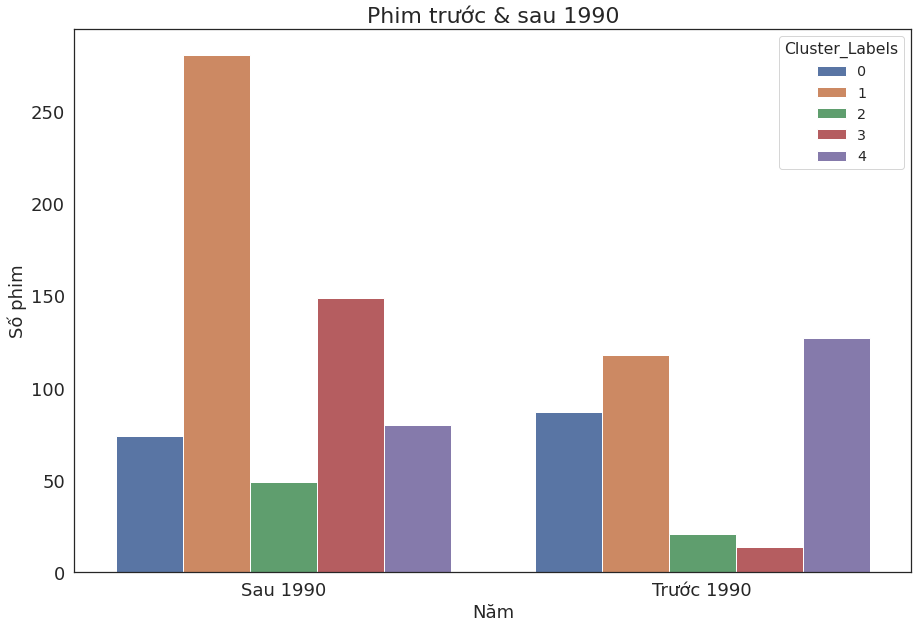

In [327]:
# Năm
plt.figure(figsize = (15,10))
sns.countplot(imdb_work['Year'].apply(lambda x: 'Trước 1990' if x==0 else 'Sau 1990'),hue=imdb_work['Cluster_Labels'])
plt.title('Phim trước & sau 1990', fontsize=22)
plt.xlabel('Năm', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

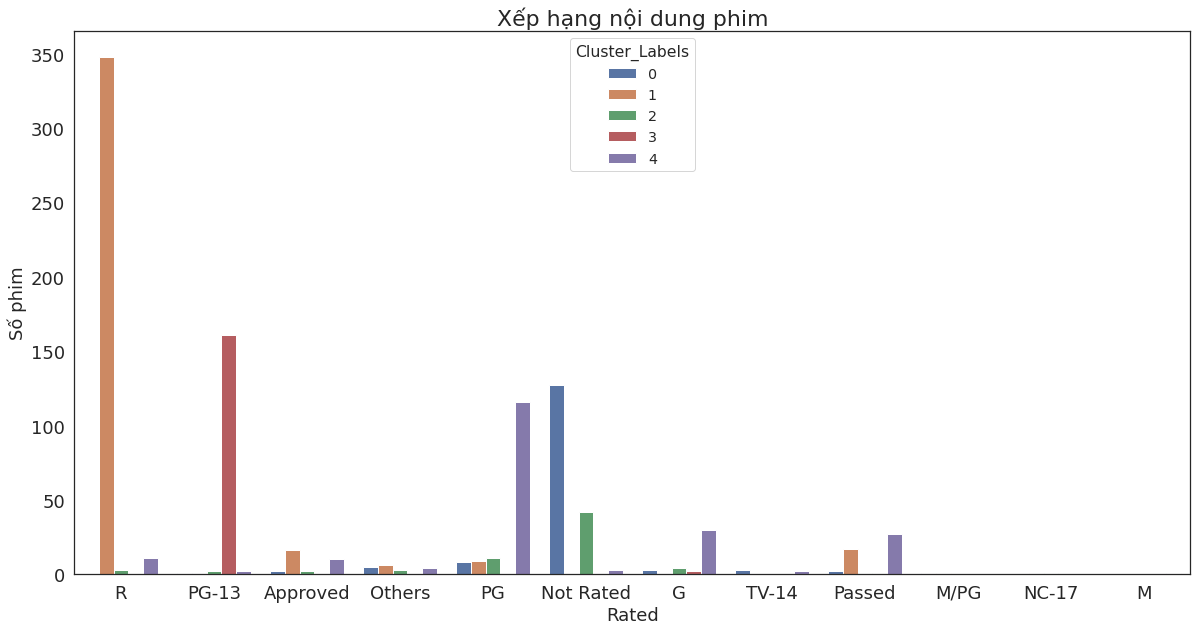

In [328]:
# Rated

plt.figure(figsize=(20,10))
sns.countplot(x = imdb['Rated_Cat'],hue=imdb['Cluster_Labels'])
plt.title('Xếp hạng nội dung phim', fontsize=22)
plt.xlabel('Rated', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



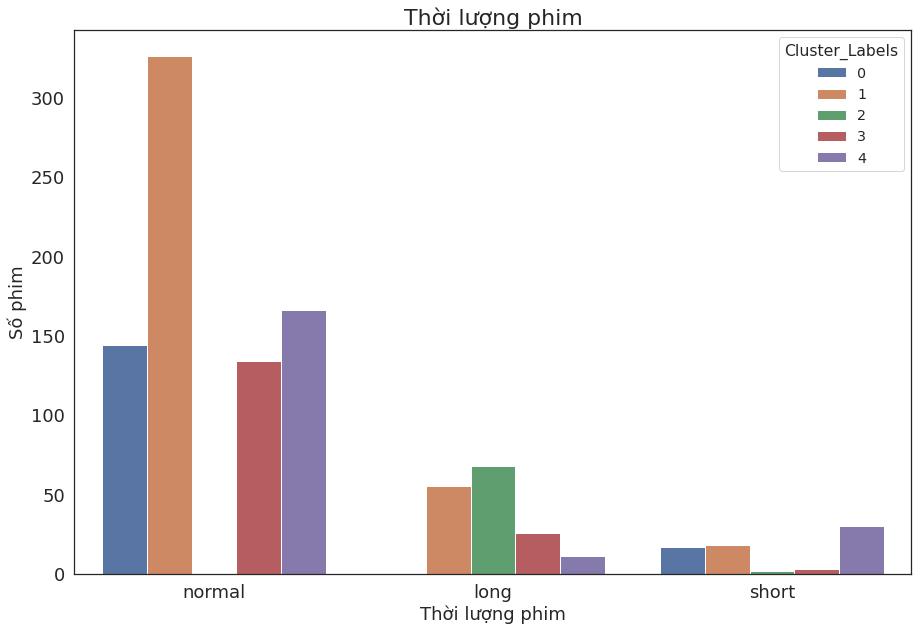

In [329]:
# Thời lượng phim
plt.figure(figsize=(15,10))
sns.countplot(imdb['Runtime_bin'],hue=imdb['Cluster_Labels'])
plt.title('Thời lượng phim', fontsize=22)
plt.xlabel('Thời lượng phim', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [330]:
# Thể loại
# Vì 1000 phim hàng đầu chủ yếu là Phim chính kịch, nên nó là thể loại chung cho hầu hết các phim.
genre_df[imdb['Cluster_Labels'] == 0].sum(axis=0).sort_values(ascending=False).head() 

Drama       144
Crime        37
Thriller     30
Comedy       27
Romance      24
dtype: int64

In [331]:
genre_df[imdb['Cluster_Labels'] == 1].sum(axis=0).sort_values(ascending=False).head() 

Drama       339
Crime       129
Thriller     70
Comedy       67
Action       66
dtype: int64

In [332]:
genre_df[imdb['Cluster_Labels'] == 2].sum(axis=0).sort_values(ascending=False).head()

Drama      63
Action     17
Comedy     16
Crime      15
Romance    13
dtype: int64

In [333]:
genre_df[imdb['Cluster_Labels'] == 3].sum(axis=0).sort_values(ascending=False).head()

Drama        114
Action        54
Adventure     51
Biography     34
Comedy        30
dtype: int64

In [334]:
genre_df[imdb['Cluster_Labels'] == 4].sum(axis=0).sort_values(ascending=False).head()

Adventure    108
Comedy        97
Drama         70
Animation     68
Action        42
dtype: int64

In [335]:
#Đạo diễn
dir_df[imdb['Cluster_Labels'] == 0].sum(axis=0).sort_values(ascending=False)

Akira Kurosawa           8
Ingmar Bergman           5
Andrei Tarkovsky         4
Alfred Hitchcock         3
Federico Fellini         3
Neeraj Pandey            2
Fred Zinnemann           2
Satoshi Kon              1
John Huston              1
Rajkumar Hirani          1
Frank Capra              1
David Lean               1
Roman Polanski           1
Billy Wilder             1
Asghar Farhadi           1
Sergio Leone             0
Richard Linklater        0
Wes Anderson             0
Taika Waititi            0
Paul Greengrass          0
Pete Docter              0
Peter Jackson            0
Quentin Tarantino        0
Steven Spielberg         0
Ridley Scott             0
Sidney Lumet             0
Rob Reiner               0
Stanley Kubrick          0
Robert Zemeckis          0
Spike Lee                0
Martin Scorsese          0
Ron Howard               0
Sam Mendes               0
Matthew Vaughn           0
Joel Coen                0
Lee Unkrich              0
Denis Villeneuve         0
A

In [336]:
dir_df[imdb['Cluster_Labels'] == 1].sum(axis=0).sort_values(ascending=False)

Martin Scorsese          9
Quentin Tarantino        9
David Fincher            6
Clint Eastwood           6
Richard Linklater        5
Ridley Scott             5
Francis Ford Coppola     5
Rob Reiner               5
Ethan Coen               5
Joel Coen                5
Billy Wilder             5
Sidney Lumet             5
Stanley Kubrick          5
Sergio Leone             4
Krzysztof Kieslowski     4
Alfred Hitchcock         4
Alejandro G. Iñárritu    4
Denis Villeneuve         4
Sam Mendes               3
Roman Polanski           3
Wes Anderson             3
Alfonso Cuarón           3
Spike Lee                3
Steven Spielberg         2
Ron Howard               2
James Mangold            2
John Ford                2
Woody Allen              2
Ingmar Bergman           2
David Lynch              2
James Cameron            2
Ang Lee                  2
Akira Kurosawa           1
Christopher Nolan        1
Federico Fellini         1
Fred Zinnemann           1
George Cukor             1
S

In [337]:
dir_df[imdb['Cluster_Labels'] == 2].sum(axis=0).sort_values(ascending=False)

Rajkumar Hirani          3
Andrei Tarkovsky         2
Neeraj Pandey            2
George Cukor             2
Akira Kurosawa           1
David Lean               1
Federico Fellini         1
Ridley Scott             0
Lee Unkrich              0
Martin Scorsese          0
Matthew Vaughn           0
Paul Greengrass          0
Pete Docter              0
Peter Jackson            0
Quentin Tarantino        0
Richard Linklater        0
Robert Zemeckis          0
Rob Reiner               0
John Huston              0
Roman Polanski           0
Ron Howard               0
Sam Mendes               0
Satoshi Kon              0
Sergio Leone             0
Sidney Lumet             0
Spike Lee                0
Stanley Kubrick          0
Steven Spielberg         0
Taika Waititi            0
Wes Anderson             0
Krzysztof Kieslowski     0
Joel Coen                0
John Ford                0
Alejandro G. Iñárritu    0
Alfonso Cuarón           0
Alfred Hitchcock         0
Ang Lee                  0
A

In [338]:
dir_df[imdb['Cluster_Labels'] == 3].sum(axis=0).sort_values(ascending=False)

Christopher Nolan        7
Steven Spielberg         6
Peter Jackson            5
Anthony Russo            4
Joe Russo                4
Woody Allen              3
Taika Waititi            3
Asghar Farhadi           3
Paul Greengrass          3
Ethan Coen               2
Wes Anderson             2
Ron Howard               2
Robert Zemeckis          2
Matthew Vaughn           2
James Mangold            2
James Cameron            2
Joel Coen                2
Denis Villeneuve         2
Clint Eastwood           2
David Fincher            2
Alfred Hitchcock         1
Stanley Kubrick          1
Hayao Miyazaki           1
Spike Lee                1
David Lynch              1
David Lean               1
Ridley Scott             1
Sergio Leone             1
Sam Mendes               1
Ang Lee                  1
Alfonso Cuarón           1
Billy Wilder             0
Richard Linklater        0
Rob Reiner               0
Satoshi Kon              0
Roman Polanski           0
Andrei Tarkovsky         0
Q

In [339]:
dir_df[imdb['Cluster_Labels'] == 4].sum(axis=0).sort_values(ascending=False)

Hayao Miyazaki           9
Charles Chaplin          6
Howard Hawks             6
Steven Spielberg         5
Alfred Hitchcock         5
Lee Unkrich              5
Woody Allen              4
John Huston              4
Pete Docter              4
Brad Bird                4
Frank Capra              4
Billy Wilder             3
Robert Zemeckis          3
John Ford                3
Stanley Kubrick          3
Rob Reiner               2
Satoshi Kon              2
George Cukor             2
Akira Kurosawa           2
David Lean               1
Martin Scorsese          1
Fred Zinnemann           1
Wes Anderson             1
David Lynch              1
Alfonso Cuarón           1
James Cameron            1
Ron Howard               1
Matthew Vaughn           1
Ang Lee                  1
Clint Eastwood           1
Asghar Farhadi           0
Anthony Russo            0
Roman Polanski           0
Sam Mendes               0
Francis Ford Coppola     0
Sergio Leone             0
Richard Linklater        0
S

In [340]:
# Diễn viên
actors_df[imdb['Cluster_Labels'] == 0].sum(axis=0).sort_values(ascending=False)

Toshirô Mifune        6
Tatsuya Nakadai       4
Ayushmann Khurrana    4
Humphrey Bogart       3
Amitabh Bachchan      3
                     ..
Gael García Bernal    0
Ewan McGregor         0
Ethan Hawke           0
Emma Watson           0
Woody Allen           0
Length: 113, dtype: int64

In [341]:
actors_df[imdb['Cluster_Labels'] == 1].sum(axis=0).sort_values(ascending=False)

Robert De Niro       14
Al Pacino            13
Ethan Hawke           7
Leonardo DiCaprio     7
Clint Eastwood        6
                     ..
Rupert Grint          0
Akshay Kumar          0
Katharine Hepburn     0
Paresh Rawal          0
Aamir Khan            0
Length: 113, dtype: int64

In [342]:
actors_df[imdb['Cluster_Labels'] == 2].sum(axis=0).sort_values(ascending=False)

Aamir Khan            9
Shah Rukh Khan        6
Sanjay Dutt           3
Akshay Kumar          2
Paresh Rawal          2
                     ..
Gary Oldman           0
Gael García Bernal    0
Ewan McGregor         0
Ethan Hawke           0
Woody Allen           0
Length: 113, dtype: int64

In [343]:
actors_df[imdb['Cluster_Labels'] == 3].sum(axis=0).sort_values(ascending=False)

Matt Damon            6
Ian McKellen          6
Tom Hanks             6
Scarlett Johansson    5
Robert Downey Jr.     5
                     ..
James Stewart         0
Jake Gyllenhaal       0
Jack Lemmon           0
Irrfan Khan           0
Jodie Foster          0
Length: 113, dtype: int64

In [344]:
actors_df[imdb['Cluster_Labels'] == 4].sum(axis=0).sort_values(ascending=False)

Humphrey Bogart      7
James Stewart        7
Charles Chaplin      6
Cary Grant           5
Katharine Hepburn    5
                    ..
Jack Nicholson       0
Ian McKellen         0
Hugh Jackman         0
Geoffrey Rush        0
Jodie Foster         0
Length: 113, dtype: int64

In [345]:
country_df[imdb['Cluster_Labels'] == 0].sum(axis=0).sort_values(ascending=False)

France            34
India             30
United States     22
Japan             20
Italy             18
United Kingdom    16
Sweden             8
Germany            4
Spain              2
Canada             1
dtype: int64

In [346]:
country_df[imdb['Cluster_Labels'] == 1].sum(axis=0).sort_values(ascending=False)

United States     307
United Kingdom     82
France             64
Germany            34
Canada             18
Italy              18
Spain              14
Sweden             13
Japan              12
India               4
dtype: int64

In [347]:
country_df[imdb['Cluster_Labels'] == 2].sum(axis=0).sort_values(ascending=False)

India             42
United States     15
France             7
Italy              6
Germany            5
United Kingdom     5
Japan              1
Spain              1
Canada             0
Sweden             0
dtype: int64

In [348]:
country_df[imdb['Cluster_Labels'] == 3].sum(axis=0).sort_values(ascending=False)

United States     143
United Kingdom     44
France             26
Germany            11
Canada             10
Italy               8
Japan               6
Spain               4
India               3
Sweden              1
dtype: int64

In [349]:
country_df[imdb['Cluster_Labels'] == 4].sum(axis=0).sort_values(ascending=False)

United States     179
United Kingdom     26
Japan              24
France              8
Canada              5
Italy               3
Spain               2
Germany             0
India               0
Sweden              0
dtype: int64

In [350]:
# Thể loại từ
plot_df[imdb['Cluster_Labels'] == 0].sum(axis=0).sort_values(ascending=False).head()

man      2.506508
young    2.224273
woman    1.950621
find     1.923279
life     1.575891
dtype: float64

In [351]:
plot_df[imdb['Cluster_Labels'] == 1].sum(axis=0).sort_values(ascending=False).head()

life     5.133333
man      3.701611
year     3.608228
young    3.546247
find     3.460501
dtype: float64

In [352]:
plot_df[imdb['Cluster_Labels'] == 2].sum(axis=0).sort_values(ascending=False).head()

man       1.034418
family    0.957111
love      0.891085
story     0.828306
life      0.641807
dtype: float64

In [353]:
plot_df[imdb['Cluster_Labels'] == 3].sum(axis=0).sort_values(ascending=False).head()

man       1.873835
life      1.733405
world     1.589350
find      1.279684
family    1.220720
dtype: float64

In [354]:
plot_df[imdb['Cluster_Labels'] == 4].sum(axis=0).sort_values(ascending=False).head()

young    2.597064
find     1.852383
girl     1.815379
new      1.774014
world    1.703508
dtype: float64

### **Hierarchical clustering (Phân cụm phân cấp)**

In [413]:
import scipy.cluster.hierarchy as shc

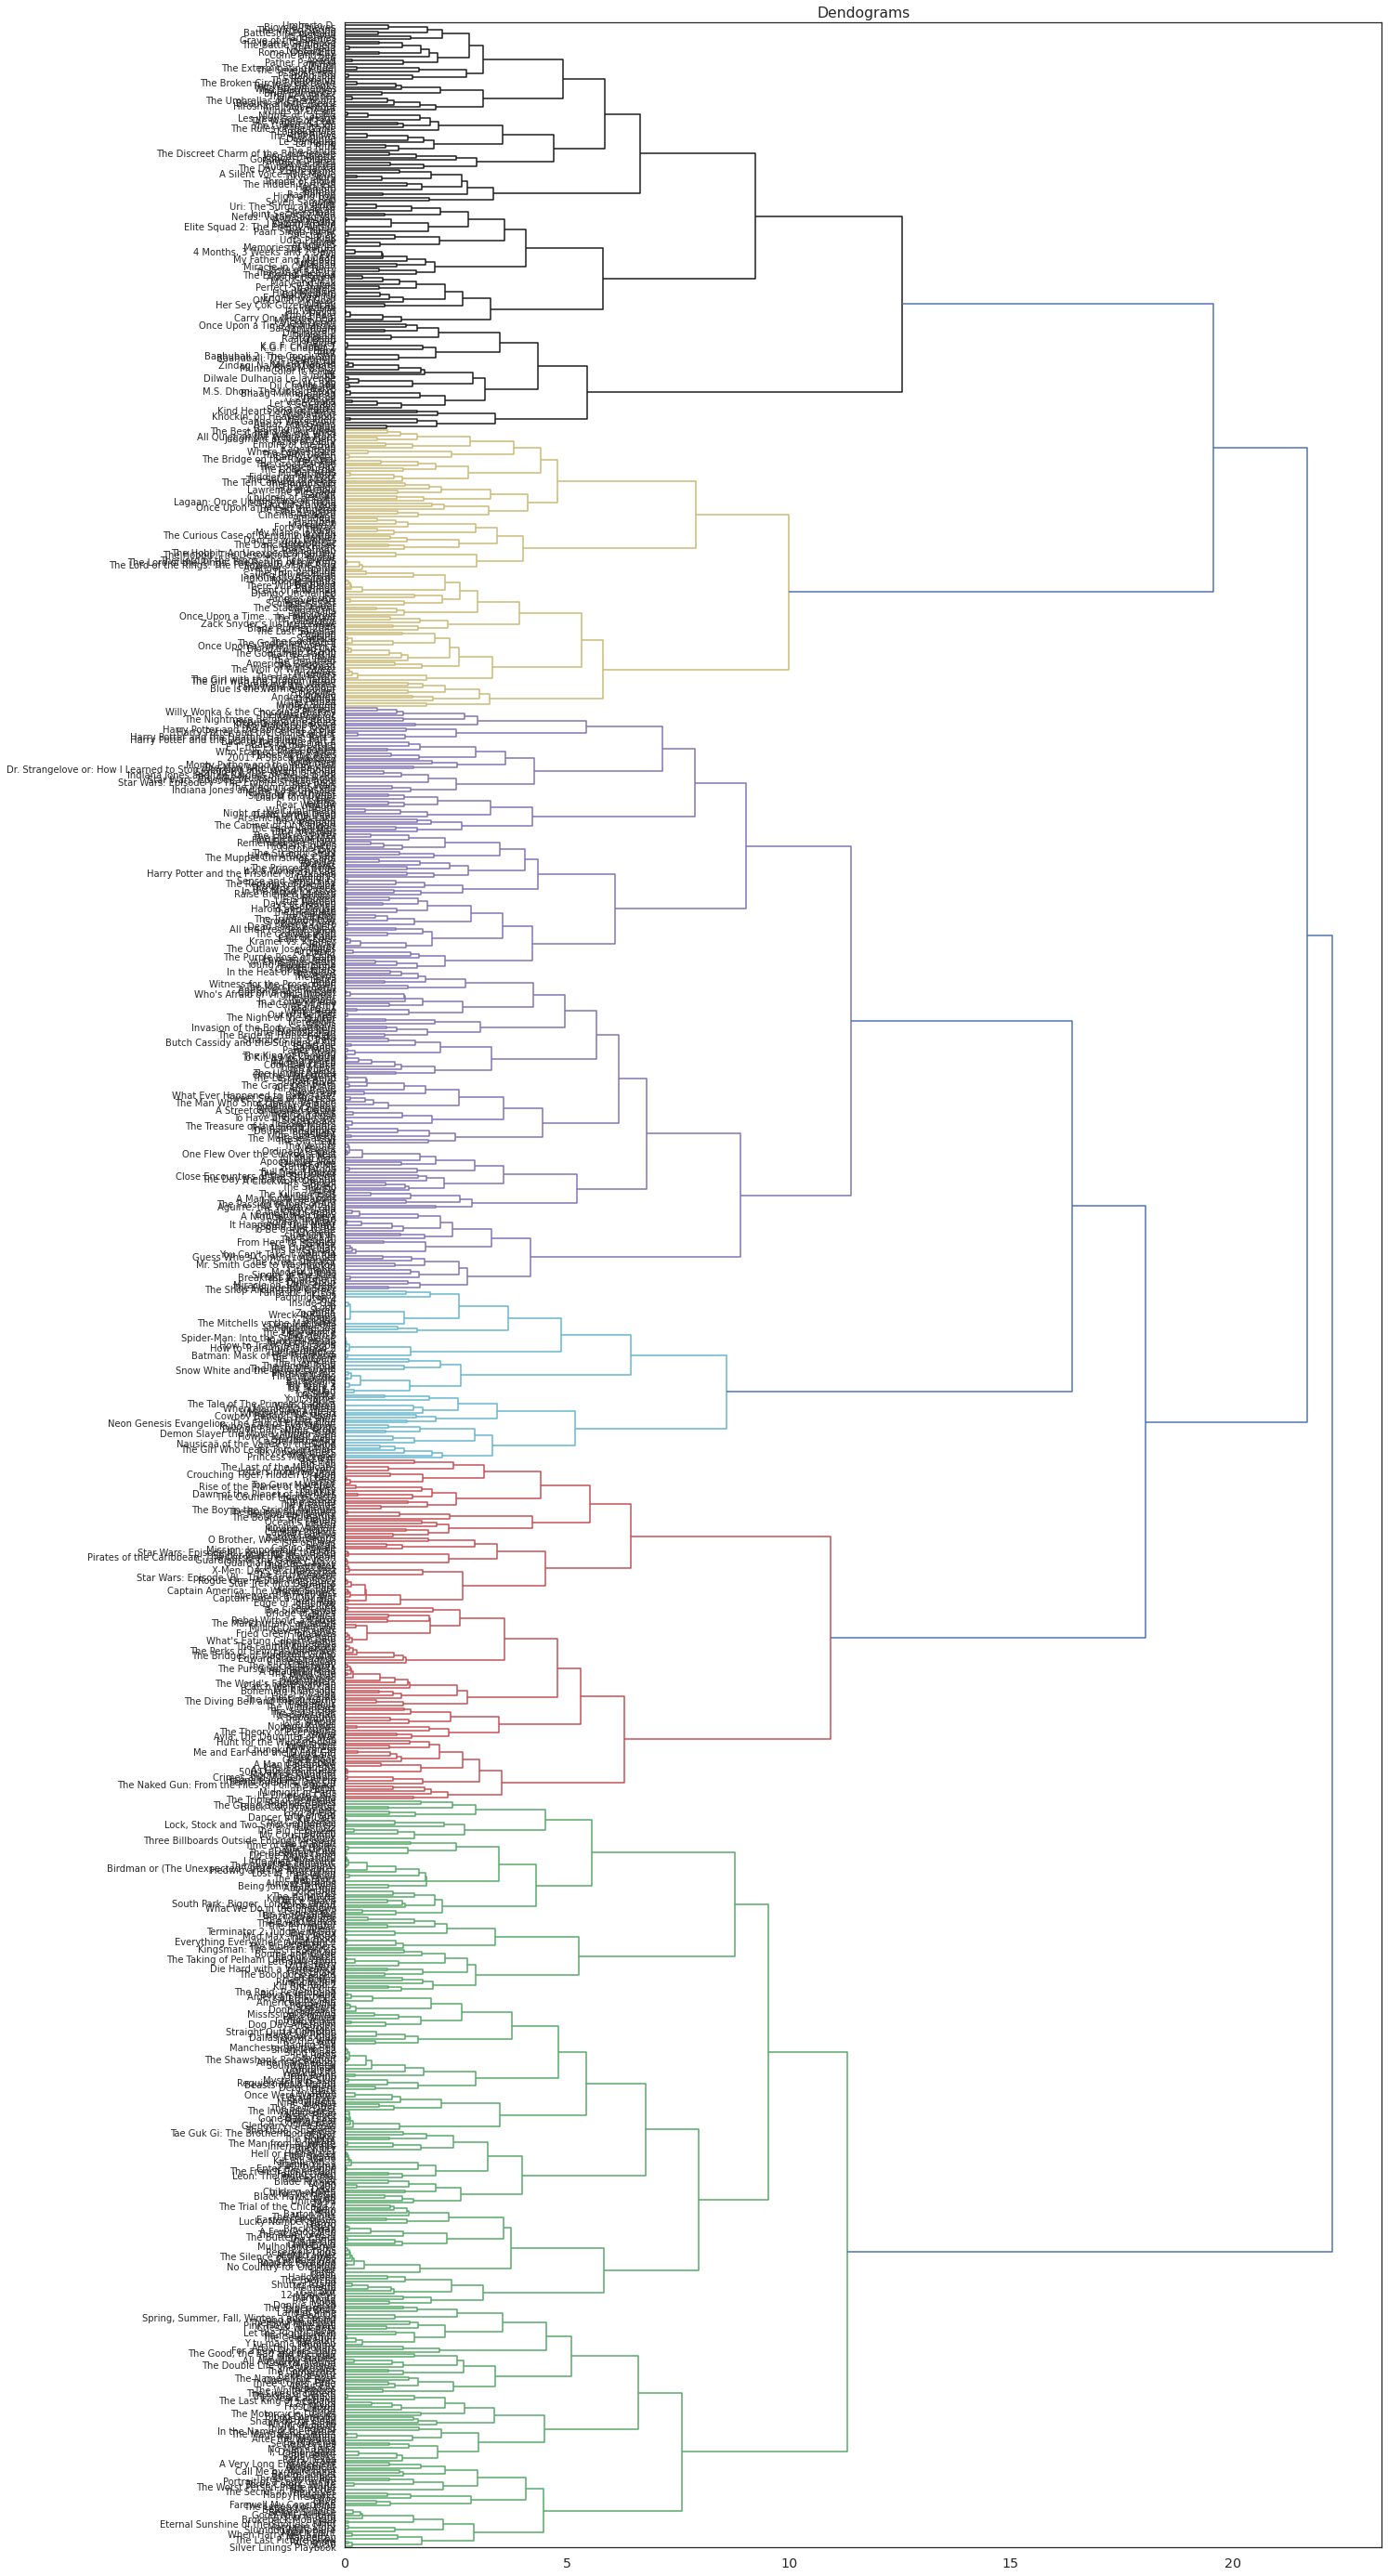

In [420]:
plt.figure(figsize=(20,50))
plt.title('Dendograms')
dend = shc.dendrogram(shc.linkage(pca_df, method = 'ward'), 
                      labels = list(imdb_work.index),
                      leaf_font_size = 10,
                      orientation = 'right')
plt.savefig('dendo.png')

In [421]:
from sklearn.cluster import AgglomerativeClustering

In [422]:
agg = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage='ward')
Cluster_hc = agg.fit_predict(imdb_work_pca)
AgglomerativeClustering()

AgglomerativeClustering()

In [426]:
SW = []
for k in {'ward'}:
  ag = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage=k)
  Cluster_hc = ag.fit_predict(imdb_work_pca)
  SW.append(silhouette_score(imdb_work_pca, Cluster_hc, metric='euclidean'))
SW

[0.10953300344391848]

In [427]:
imdb['Cluster_hc_labels'] = Cluster_hc
imdb_work['Cluster_hc_labels'] = Cluster_hc


In [428]:
imdb_work['Cluster_hc_labels'].value_counts()

0    298
1    296
2    161
4    135
3    110
Name: Cluster_hc_labels, dtype: int64

In [430]:
#Đặc điểm cụm
# Tiêu đề
print("Cluster 0 : \n")
print(imdb_work[imdb_work['Cluster_hc_labels'] == 0].index)
print("\nCluster 1 : \n")
print(imdb_work[imdb_work['Cluster_hc_labels'] == 1].index)
print("\nCluster 2 : \n")
print(imdb_work[imdb_work['Cluster_hc_labels'] == 2].index)
print("\nCluster 3 : \n")
print(imdb_work[imdb_work['Cluster_hc_labels'] == 3].index)
print("\nCluster 4 : \n")
print(imdb_work[imdb_work['Cluster_hc_labels'] == 4].index)

Cluster 0 : 

Index(['12 Angry Men', 'Star Wars: Episode V - The Empire Strikes Back',
       'One Flew Over the Cuckoo's Nest', 'Spirited Away', 'Star Wars',
       'It's a Wonderful Life', 'The Lion King', 'Back to the Future',
       'Apocalypse Now', 'Alien',
       ...
       'Close Encounters of the Third Kind', 'The Odd Couple',
       'The Jungle Book', 'The Birds', 'Breakfast at Tiffany's', 'Sabrina',
       'From Here to Eternity', 'Snow White and the Seven Dwarfs',
       'The 39 Steps', 'The Invisible Man'],
      dtype='object', name='Title', length=298)

Cluster 1 : 

Index(['The Shawshank Redemption', 'Fight Club',
       'The Good, the Bad and the Ugly', 'The Matrix', 'Goodfellas',
       'City of God', 'Se7en', 'Terminator 2: Judgment Day',
       'The Silence of the Lambs', 'Whiplash',
       ...
       'Three Colors: White', 'Falling Down', 'My Cousin Vinny', 'Barton Fink',
       'RoboCop', 'Lethal Weapon', 'After Hours', 'The Road Warrior',
       'The Taking of Pe

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([  0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 7 Text major ticklabel objects>)

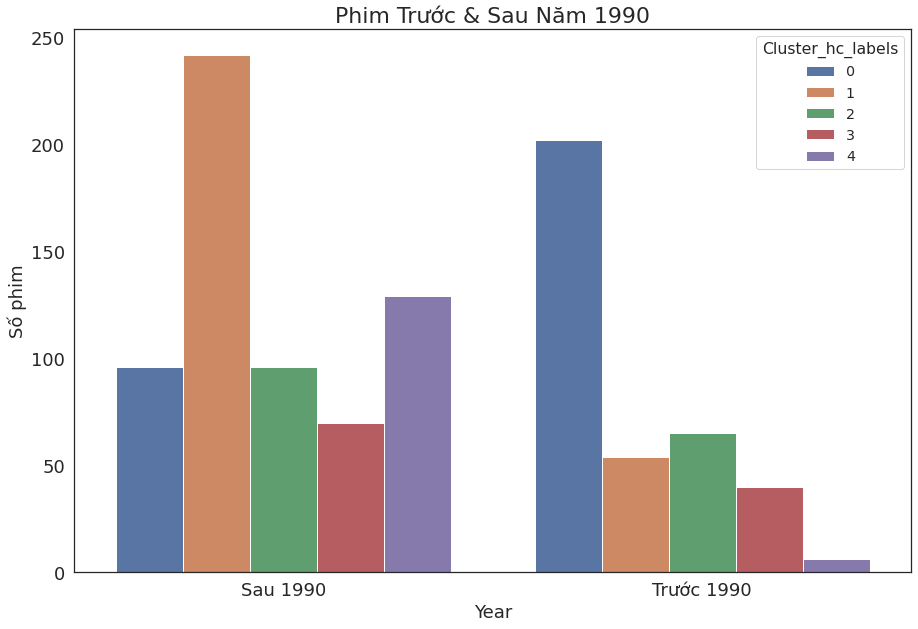

In [432]:
# Year
plt.figure(figsize = (15,10))
sns.countplot(imdb_work['Year'].apply(lambda x: 'Trước 1990' if x==0 else 'Sau 1990'),hue=imdb_work['Cluster_hc_labels'])
plt.title('Phim Trước & Sau Năm 1990', fontsize=22)
plt.xlabel('Year', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

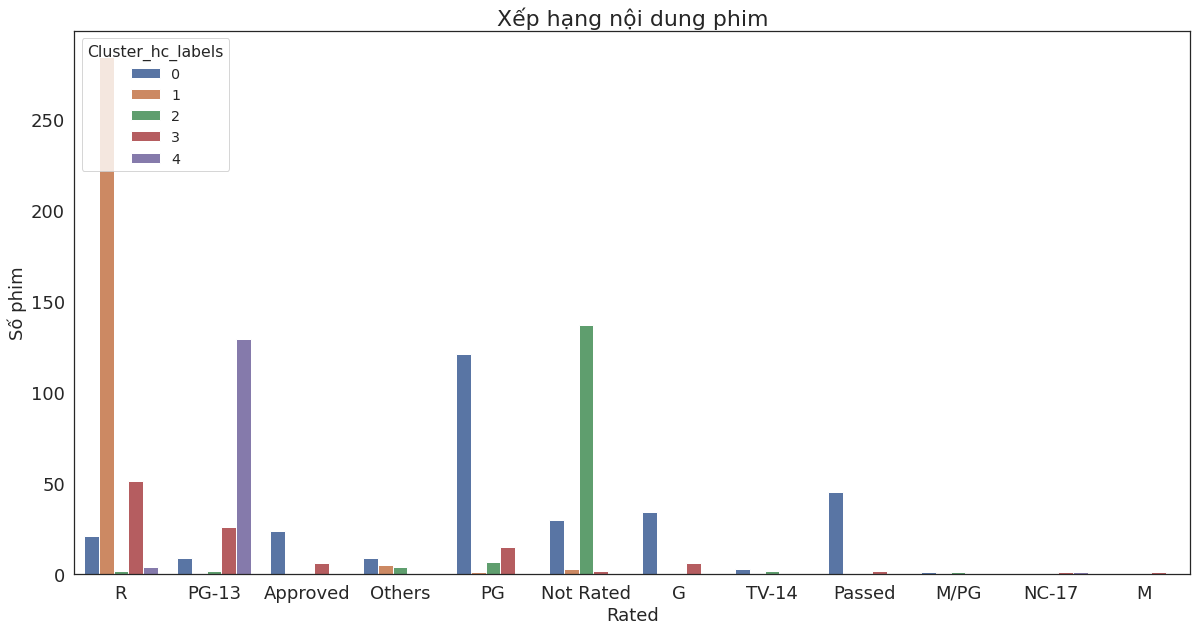

In [433]:
# Rated
plt.figure(figsize=(20,10))
sns.countplot(x = imdb['Rated_Cat'],hue=imdb['Cluster_hc_labels'])
plt.title('Xếp hạng nội dung phim', fontsize=22)
plt.xlabel('Rated', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



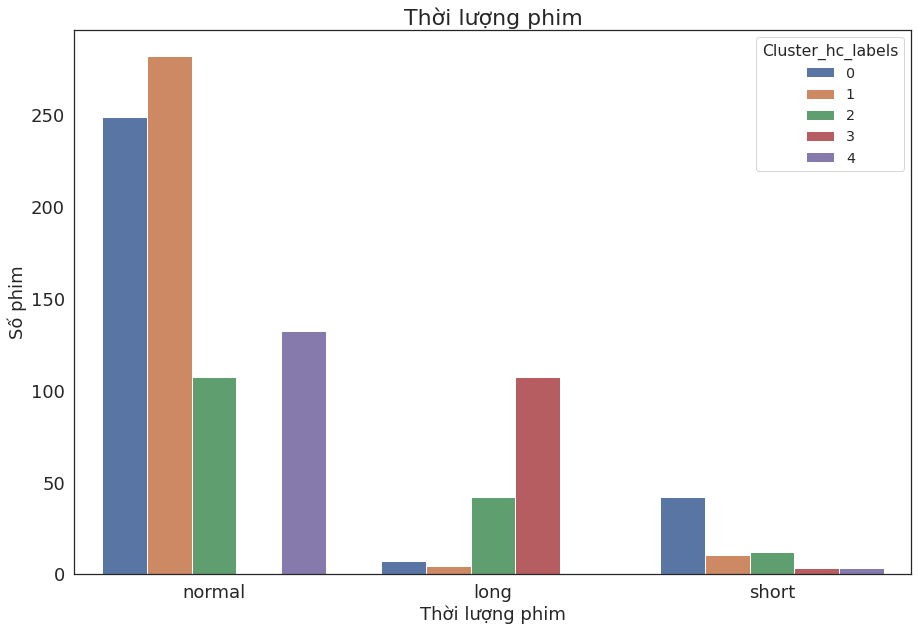

In [434]:
# Runtime
plt.figure(figsize=(15,10))
sns.countplot(imdb['Runtime_bin'],hue=imdb['Cluster_hc_labels'])
plt.title('Thời lượng phim', fontsize=22)
plt.xlabel('Thời lượng phim', fontsize=18)
plt.ylabel('Số phim', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

In [435]:
# Genre
# Since top 250 movies are mostly Drama, so it is a generic genre for most of the movies.
genre_df[imdb['Cluster_hc_labels'] == 0].sum(axis=0).sort_values(ascending=False).head()

Drama        157
Adventure     99
Comedy        94
Animation     72
Family        40
dtype: int64

In [436]:
genre_df[imdb['Cluster_hc_labels'] == 1].sum(axis=0).sort_values(ascending=False).head()

Drama       230
Crime        95
Comedy       67
Action       65
Thriller     58
dtype: int64

In [437]:
genre_df[imdb['Cluster_hc_labels'] == 2].sum(axis=0).sort_values(ascending=False).head()

Drama       146
Crime        40
Comedy       39
Action       33
Thriller     25
dtype: int64

In [438]:
genre_df[imdb['Cluster_hc_labels'] == 3].sum(axis=0).sort_values(ascending=False).head()

Drama        102
Adventure     25
Crime         24
Biography     23
Action        20
dtype: int64

In [439]:
genre_df[imdb['Cluster_hc_labels'] == 4].sum(axis=0).sort_values(ascending=False).head()

Drama        95
Action       46
Adventure    39
Comedy       31
Biography    27
dtype: int64

In [442]:
dir_df[imdb['Cluster_hc_labels'] == 0].sum(axis=0).sort_values(ascending=False)

Alfred Hitchcock         12
Hayao Miyazaki            9
Billy Wilder              9
Howard Hawks              7
Charles Chaplin           6
Stanley Kubrick           6
John Huston               6
Steven Spielberg          5
John Ford                 5
Frank Capra               5
Lee Unkrich               5
Pete Docter               4
Woody Allen               4
Brad Bird                 4
Satoshi Kon               4
Rob Reiner                3
Robert Zemeckis           3
Sidney Lumet              3
George Cukor              3
Fred Zinnemann            3
Akira Kurosawa            2
Francis Ford Coppola      2
David Lynch               2
Andrei Tarkovsky          2
Ang Lee                   2
Clint Eastwood            1
Roman Polanski            1
Matthew Vaughn            1
Martin Scorsese           1
Ron Howard                1
Ridley Scott              1
Alfonso Cuarón            1
Wes Anderson              1
Richard Linklater         0
Sam Mendes                0
Sergio Leone        

In [443]:
dir_df[imdb['Cluster_hc_labels'] == 1].sum(axis=0).sort_values(ascending=False)

Joel Coen                5
Martin Scorsese          5
Clint Eastwood           5
Ethan Coen               5
Krzysztof Kieslowski     4
Rob Reiner               4
Richard Linklater        4
David Fincher            4
Quentin Tarantino        4
Alfonso Cuarón           3
Wes Anderson             3
Spike Lee                3
Sergio Leone             3
Sam Mendes               3
James Cameron            3
Alejandro G. Iñárritu    2
Ridley Scott             2
Matthew Vaughn           2
Ron Howard               2
Sidney Lumet             2
James Mangold            2
Woody Allen              2
David Lynch              2
Denis Villeneuve         2
Federico Fellini         1
Ang Lee                  1
Roman Polanski           1
Paul Greengrass          1
Asghar Farhadi           1
Christopher Nolan        1
Taika Waititi            1
Ingmar Bergman           1
Alfred Hitchcock         1
Andrei Tarkovsky         0
Anthony Russo            0
Charles Chaplin          0
Satoshi Kon              0
S

In [444]:
dir_df[imdb['Cluster_hc_labels'] == 2].sum(axis=0).sort_values(ascending=False)

Akira Kurosawa           9
Ingmar Bergman           5
Neeraj Pandey            4
Rajkumar Hirani          4
Federico Fellini         4
Andrei Tarkovsky         4
Fred Zinnemann           1
Roman Polanski           1
David Lean               1
Paul Greengrass          0
Matthew Vaughn           0
Ridley Scott             0
Peter Jackson            0
Quentin Tarantino        0
Martin Scorsese          0
Richard Linklater        0
Pete Docter              0
Robert Zemeckis          0
Rob Reiner               0
Krzysztof Kieslowski     0
Ron Howard               0
Sam Mendes               0
Satoshi Kon              0
Sergio Leone             0
Sidney Lumet             0
Spike Lee                0
Stanley Kubrick          0
Steven Spielberg         0
Taika Waititi            0
Wes Anderson             0
Lee Unkrich              0
Joel Coen                0
John Huston              0
John Ford                0
Alfonso Cuarón           0
Alfred Hitchcock         0
Ang Lee                  0
A

In [445]:
dir_df[imdb['Cluster_hc_labels'] == 3].sum(axis=0).sort_values(ascending=False)

Peter Jackson            5
Quentin Tarantino        5
Martin Scorsese          4
Steven Spielberg         4
Francis Ford Coppola     3
Stanley Kubrick          3
Denis Villeneuve         3
David Lean               3
David Fincher            3
Christopher Nolan        3
James Cameron            2
Ridley Scott             2
Sergio Leone             2
George Cukor             2
Alejandro G. Iñárritu    2
James Mangold            1
Ingmar Bergman           1
Joe Russo                1
Richard Linklater        1
Akira Kurosawa           1
Roman Polanski           1
Spike Lee                1
Anthony Russo            1
Andrei Tarkovsky         1
Rob Reiner               0
Robert Zemeckis          0
Neeraj Pandey            0
Ron Howard               0
Sam Mendes               0
Satoshi Kon              0
Sidney Lumet             0
Rajkumar Hirani          0
Taika Waititi            0
Pete Docter              0
Wes Anderson             0
Paul Greengrass          0
Joel Coen                0
M

In [446]:
dir_df[imdb['Cluster_hc_labels'] == 4].sum(axis=0).sort_values(ascending=False)

Steven Spielberg         4
Christopher Nolan        4
Woody Allen              3
Taika Waititi            3
Anthony Russo            3
Asghar Farhadi           3
Paul Greengrass          3
Joe Russo                3
Clint Eastwood           3
Ethan Coen               2
Wes Anderson             2
Ron Howard               2
Robert Zemeckis          2
Joel Coen                2
Ang Lee                  1
Denis Villeneuve         1
David Fincher            1
Alfonso Cuarón           1
Matthew Vaughn           1
Ridley Scott             1
Hayao Miyazaki           1
James Mangold            1
Sam Mendes               1
David Lean               0
Rajkumar Hirani          0
Richard Linklater        0
Rob Reiner               0
Billy Wilder             0
Roman Polanski           0
Satoshi Kon              0
Peter Jackson            0
Sergio Leone             0
Sidney Lumet             0
Spike Lee                0
Stanley Kubrick          0
Andrei Tarkovsky         0
Alfred Hitchcock         0
Q

In [447]:
# Actors
actors_df[imdb['Cluster_hc_labels'] == 0].sum(axis=0).sort_values(ascending=False)

James Stewart        11
Humphrey Bogart      10
Cary Grant            7
Charles Chaplin       6
Paul Newman           6
                     ..
Julianne Moore        0
Julie Delpy           0
Kevin Spacey          0
Leonardo DiCaprio     0
Jodie Foster          0
Length: 113, dtype: int64

In [448]:
actors_df[imdb['Cluster_hc_labels'] == 1].sum(axis=0).sort_values(ascending=False)

Robert De Niro       6
Ethan Hawke          6
Clint Eastwood       6
Al Pacino            5
Julie Delpy          5
                    ..
Paul Newman          0
Emma Watson          0
Robert Downey Jr.    0
John Wayne           0
Aamir Khan           0
Length: 113, dtype: int64

In [449]:
actors_df[imdb['Cluster_hc_labels'] == 2].sum(axis=0).sort_values(ascending=False)

Aamir Khan            7
Toshirô Mifune        7
Shah Rukh Khan        5
Tatsuya Nakadai       5
Akshay Kumar          5
                     ..
Gael García Bernal    0
Ewan McGregor         0
Ethan Hawke           0
Emma Watson           0
Woody Allen           0
Length: 113, dtype: int64

In [451]:
actors_df[imdb['Cluster_hc_labels'] == 3].sum(axis=0).sort_values(ascending=False)

Al Pacino                 8
Leonardo DiCaprio         6
Ian McKellen              5
Robert De Niro            5
Christian Bale            4
                         ..
Jean-Louis Trintignant    0
Jared Leto                0
James Stewart             0
Irrfan Khan               0
Woody Allen               0
Length: 113, dtype: int64

In [452]:
actors_df[imdb['Cluster_hc_labels'] == 4].sum(axis=0).sort_values(ascending=False)

Tom Hanks             6
Matt Damon            5
Scarlett Johansson    5
Tom Cruise            4
Chris Evans           4
                     ..
James Stewart         0
Jake Gyllenhaal       0
Jack Lemmon           0
Irrfan Khan           0
Jodie Foster          0
Length: 113, dtype: int64

In [453]:
country_df[imdb['Cluster_hc_labels'] == 0].sum(axis=0).sort_values(ascending=False)

United States     249
United Kingdom     42
Japan              30
France             12
Canada              7
Germany             4
India               2
Italy               2
Spain               1
Sweden              0
dtype: int64

In [454]:
country_df[imdb['Cluster_hc_labels'] == 1].sum(axis=0).sort_values(ascending=False)

United States     208
United Kingdom     66
France             56
Germany            29
Italy              17
Canada             15
Spain              14
Japan               9
Sweden              8
India               3
dtype: int64

In [455]:
country_df[imdb['Cluster_hc_labels'] == 2].sum(axis=0).sort_values(ascending=False)

India             66
France            32
Italy             19
Japan             15
United Kingdom    11
Sweden             8
Germany            3
United States      3
Canada             1
Spain              1
dtype: int64

In [456]:
country_df[imdb['Cluster_hc_labels'] == 3].sum(axis=0).sort_values(ascending=False)

United States     92
United Kingdom    23
France            15
Italy             10
Germany            7
Sweden             5
India              4
Canada             3
Japan              3
Spain              3
dtype: int64

In [457]:
country_df[imdb['Cluster_hc_labels'] == 4].sum(axis=0).sort_values(ascending=False)

United States     114
United Kingdom     31
France             24
Germany            11
Canada              8
Japan               6
Italy               5
India               4
Spain               4
Sweden              1
dtype: int64

In [458]:
# Plot Words
plot_df[imdb['Cluster_hc_labels'] == 0].sum(axis=0).sort_values(ascending=False).head()

young    3.134950
find     2.806024
new      2.413290
man      2.249679
old      2.242724
dtype: float64

In [459]:
plot_df[imdb['Cluster_hc_labels'] == 1].sum(axis=0).sort_values(ascending=False).head()

life     3.649647
young    2.930585
year     2.837000
man      2.833383
find     2.783168
dtype: float64

In [460]:
plot_df[imdb['Cluster_hc_labels'] == 2].sum(axis=0).sort_values(ascending=False).head()

man      2.922058
young    2.020835
life     1.850386
woman    1.729317
find     1.572225
dtype: float64

In [461]:
plot_df[imdb['Cluster_hc_labels'] == 3].sum(axis=0).sort_values(ascending=False).head()

war         1.793786
life        1.455606
world       1.270796
family      0.965814
american    0.916371
dtype: float64

In [462]:
plot_df[imdb['Cluster_hc_labels'] == 4].sum(axis=0).sort_values(ascending=False).head()

man      1.630843
life     1.621025
world    1.446681
new      1.128634
day      1.101827
dtype: float64

In [463]:
plot_df[imdb['Cluster_hc_labels'] == 5].sum(axis=0).sort_values(ascending=False).head()

man         0.0
friend      0.0
american    0.0
lead        0.0
force       0.0
dtype: float64

In [464]:
imdb.to_excel('Clustered.xlsx')

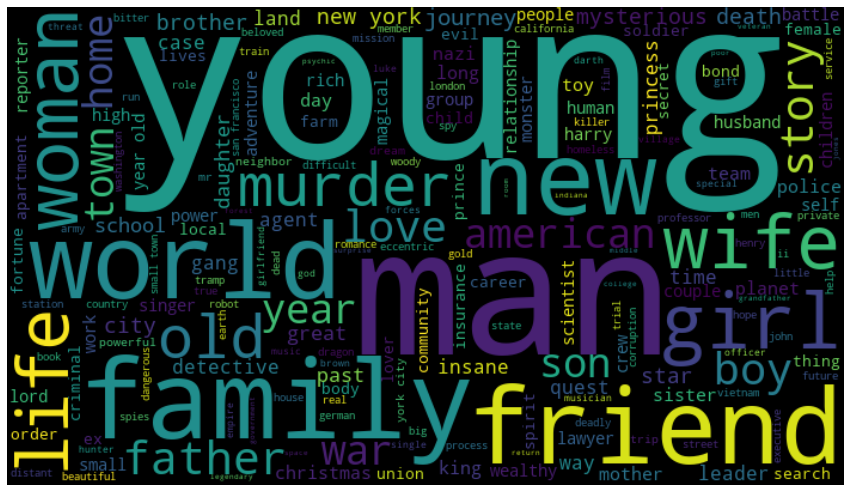

In [465]:
from wordcloud import WordCloud
# Word Cloud Plot
def preprocess(plot):
    vocab = nlp(plot)
    tokens=[]
    # tokens = [token for token in re.split('\W+',plot)]
    for token in vocab:
        if 'noun' in spacy.explain(token.tag_):
          tokens.append(token.lower_)

    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords and token not in string.punctuation:
            cleaned_tokens.append(token)
    return cleaned_tokens
# Cluster 0
cluster1_plot = []
for plot in imdb[imdb['Cluster_hc_labels']==0]['Plot']:
  cluster1_plot.extend(preprocess(plot))

plt.figure(figsize=(15,10))
wc = WordCloud(width=700, height=400).generate(' '.join(cluster1_plot))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

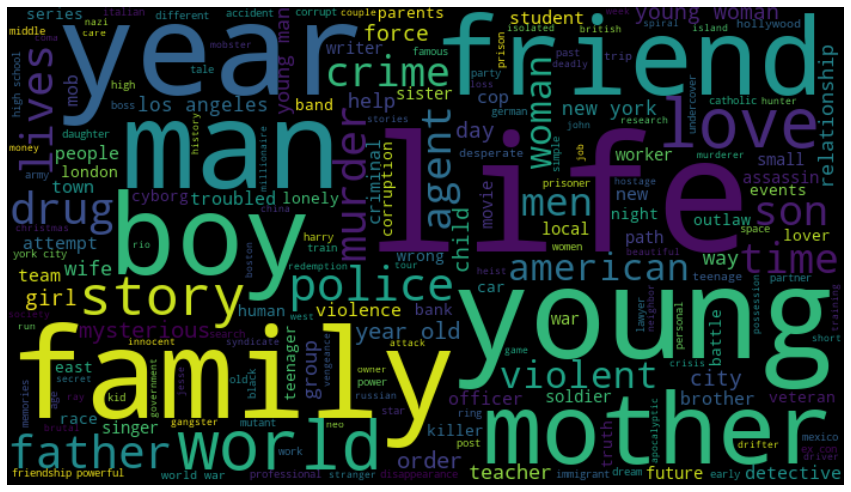

In [466]:
# Cluster 1
cluster1_plot = []
for plot in imdb[imdb['Cluster_hc_labels']==1]['Plot']:
  cluster1_plot.extend(preprocess(plot))

plt.figure(figsize=(15,10))
wc = WordCloud(width=700, height=400).generate(' '.join(cluster1_plot))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

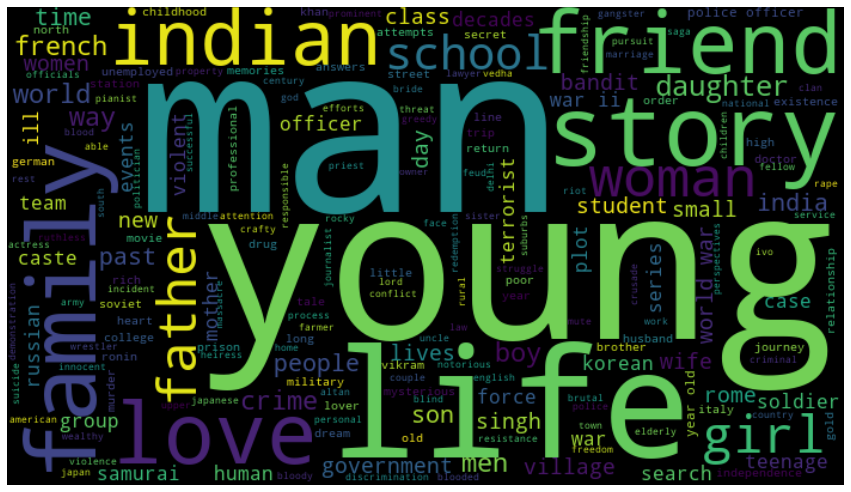

In [467]:
# Cluster 2
cluster1_plot = []
for plot in imdb[imdb['Cluster_hc_labels']==2]['Plot']:
  cluster1_plot.extend(preprocess(plot))

plt.figure(figsize=(15,10))
wc = WordCloud(width=700, height=400).generate(' '.join(cluster1_plot))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

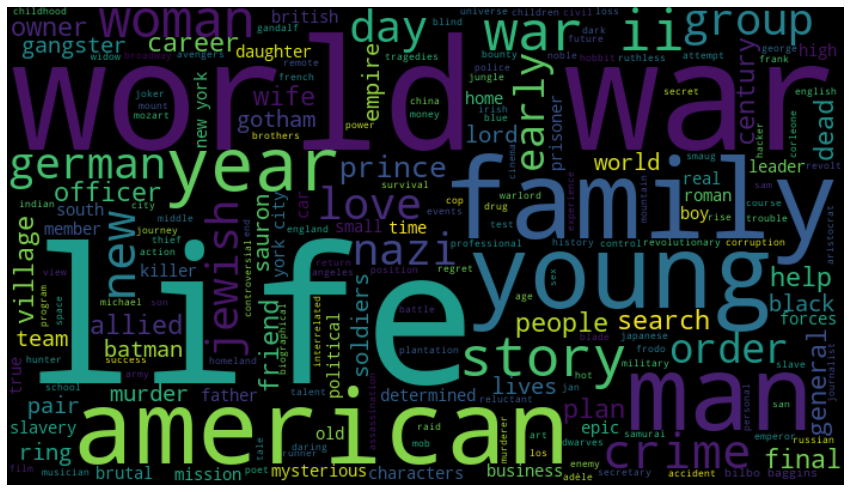

In [468]:
# Cluster 3
cluster1_plot = []
for plot in imdb[imdb['Cluster_hc_labels']==3]['Plot']:
  cluster1_plot.extend(preprocess(plot))

plt.figure(figsize=(15,10))
wc = WordCloud(width=700, height=400).generate(' '.join(cluster1_plot))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

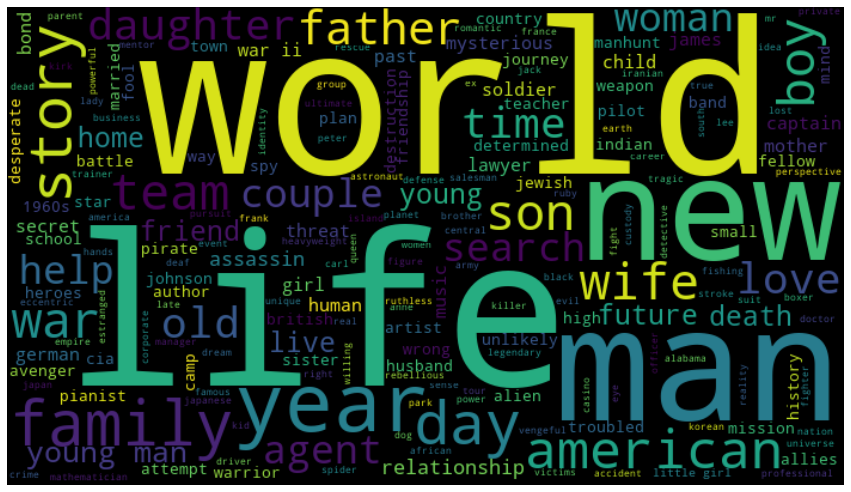

In [469]:
# Cluster 4
cluster1_plot = []
for plot in imdb[imdb['Cluster_hc_labels']==4]['Plot']:
  cluster1_plot.extend(preprocess(plot))

plt.figure(figsize=(15,10))
wc = WordCloud(width=700, height=400).generate(' '.join(cluster1_plot))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

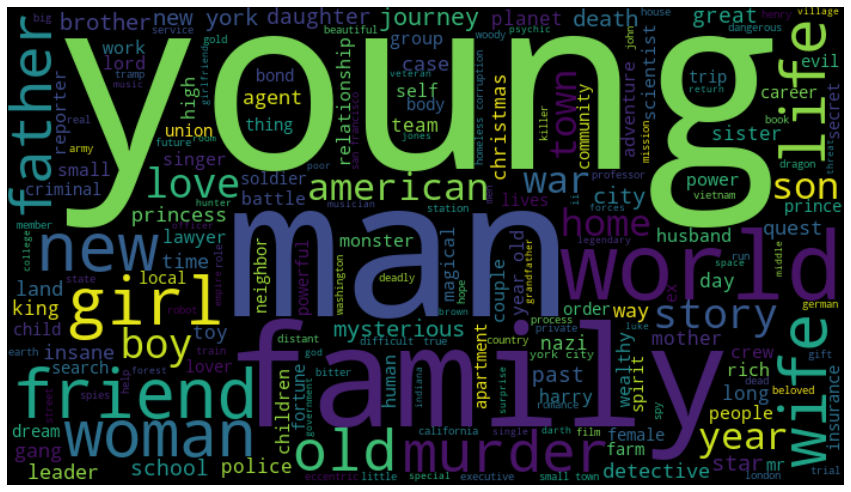

In [470]:
# Cluster 0
cluster1_plot = []
for plot in imdb[imdb['Cluster_hc_labels']==0]['Plot']:
  cluster1_plot.extend(preprocess(plot))

plt.figure(figsize=(15,10))
wc = WordCloud(width=700, height=400).generate(' '.join(cluster1_plot))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

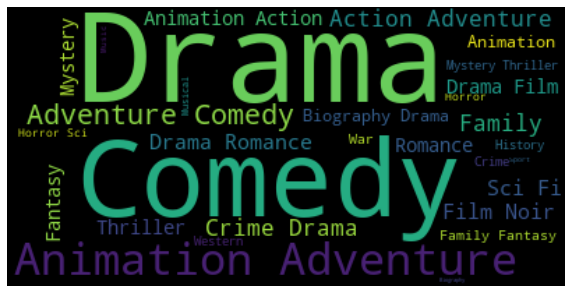

In [471]:
genre_c1 = []
for genre in imdb[imdb['Cluster_hc_labels']==0]['Genre']:
  genre_c1.extend(genre.split(','))

# plt.figure(figsize=(15,10))
wc = WordCloud().generate(' '.join(genre_c1))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

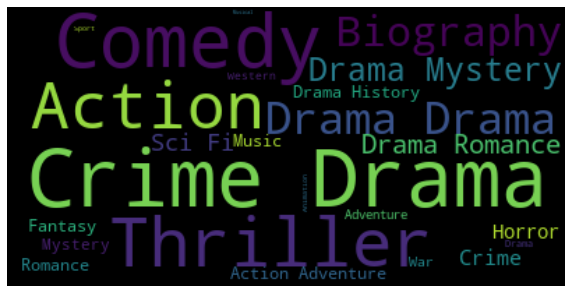

In [472]:
genre_c1 = []
for genre in imdb[imdb['Cluster_hc_labels']==1]['Genre']:
  genre_c1.extend(genre.split(','))

# plt.figure(figsize=(15,10))
wc = WordCloud().generate(' '.join(genre_c1))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

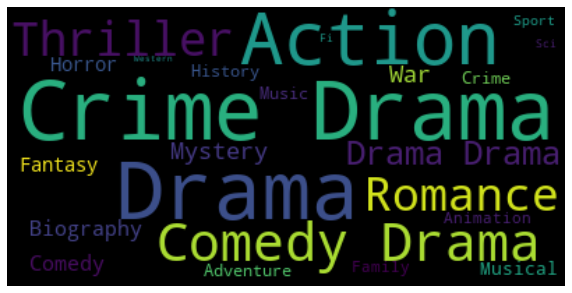

In [473]:
genre_c1 = []
for genre in imdb[imdb['Cluster_hc_labels']==2]['Genre']:
  genre_c1.extend(genre.split(','))

# plt.figure(figsize=(15,10))
wc = WordCloud().generate(' '.join(genre_c1))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

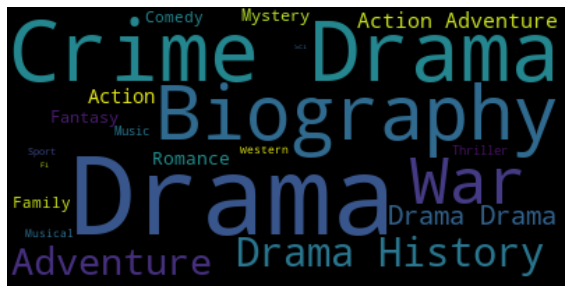

In [474]:
genre_c1 = []
for genre in imdb[imdb['Cluster_hc_labels']==3]['Genre']:
  genre_c1.extend(genre.split(','))

# plt.figure(figsize=(15,10))
wc = WordCloud().generate(' '.join(genre_c1))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

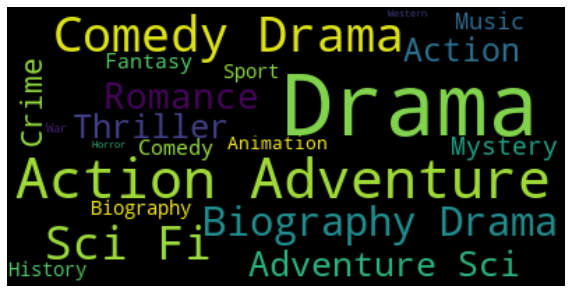

In [475]:
genre_c1 = []
for genre in imdb[imdb['Cluster_hc_labels']==4]['Genre']:
  genre_c1.extend(genre.split(','))

# plt.figure(figsize=(15,10))
wc = WordCloud().generate(' '.join(genre_c1))
plt.imshow(wc,interpolation='bilinear')
plt.axis('off')
plt.show()

### **So sánh cụm**

In [476]:
pd.crosstab(imdb['Cluster_Labels'],imdb['Cluster_hc_labels'], margins = True)

Cluster_hc_labels    0    1    2    3    4   All
Cluster_Labels                                  
0                   36    9  115    0    1   161
1                   65  274    2   53    5   399
2                    4    2   42   22    0    70
3                    9    0    0   25  129   163
4                  184   11    2   10    0   207
All                298  296  161  110  135  1000